<a href="https://colab.research.google.com/github/t8101349/Colab-/blob/master/05_02_LAB_VideoGameSales_28_%E7%8E%8B%E9%9F%8B%E5%8D%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 完成後請寄到EMAIL : clement.class.02@gmail.com
* 信件主旨請設定為： 05-02.LAB_VideoGameSales_學號_姓名  (例: "05-02.LAB_VideoGameSales_00_陳仁政")
* 附件檔名請設定為： 05-02.LAB_VideoGameSales_學號_姓名.ipynb (例: "05-02.LAB_VideoGameSales_00_陳仁政.ipynb")

# Video Game Sales
- https://www.kaggle.com/gregorut/videogamesales
- https://www.kaggle.com/snanilim/video-games-sales-analysis-and-visualization

<div><p>This dataset contains a list of video games with sales greater than 100,000 copies.  It was generated by a scrape of <a href="http://www.vgchartz.com/" target="_blank">vgchartz.com</a>.</p>
<p>Fields include</p>
<ul>
<li><p>Rank - Ranking of overall sales</p></li>
<li><p>Name - The games name</p></li>
<li><p>Platform - Platform of the games release (i.e. PC,PS4, etc.)</p></li>
<li><p>Year - Year of the game's release</p></li>
<li><p>Genre - Genre of the game</p></li>
<li><p>Publisher - Publisher of the game</p></li>
<li><p>NA_Sales - Sales in North America (in millions)</p></li>
<li><p>EU_Sales - Sales in Europe (in millions)</p></li>
<li><p>JP_Sales - Sales in Japan (in millions)</p></li>
<li><p>Other_Sales - Sales in the rest of the world (in millions)</p></li>
<li><p>Global_Sales - Total worldwide sales.</p></li>
</ul>
<p>The script to scrape the data is available at <a href="https://github.com/GregorUT/vgchartzScrape" target="_blank">https://github.com/GregorUT/vgchartzScrape</a>.<br>
It is based on BeautifulSoup using Python.<br>
There are 16,598 records.  2 records were dropped due to incomplete information.</p></div>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 載入與整理資料

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/vgsales.csv")
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
#查看資料筆數跟欄位數目
data.shape

(16598, 11)

In [ ]:
# 檢查資料欄位的型態，以及缺失狀況
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# 計算各欄位資料缺失狀況
data.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
# # 年份的格式錯誤，所以需要更改成整數型態
# data['Year'].replace(np.nan, 0, inplace=True) #因為整數沒有nan，所以需要先將nan改成 0
# data['Year'] = data['Year'].astype('int32') #改變年份的資料型態
# data.head()
# 不合適 不轉換

In [ ]:
# 查看一下資料的基本統計值
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


↑ 問題：為何各地區的銷售數量的平均跟中位數都差異那麼大？

長尾效應
有離峰值

# 哪一種類的電玩最受歡迎

In [ ]:
# 計算各種電玩類別的總數
Genre_num = data.groupby(by=['Genre']).size()
Genre_num
# data['Genre'].value_counts()

,0
Genre,
Action,3316
Adventure,1286
Fighting,848
Misc,1739
Platform,886
Puzzle,582
Racing,1249
Role-Playing,1488
Shooter,1310


In [ ]:
# 練習題
# 找出遊戲總數最多的前三年
data['Year'].value_counts().head(3)

,count
Year,
2009.0,1431
2008.0,1428
2010.0,1259


In [ ]:
# 練習題
# 找出遊戲總數最多的前三個遊戲商
group = data.groupby(by= ['Platform']).size().reset_index(name='count')
group = group.sort_values(by = 'count', ascending=False)
group.head(3)

,Platform,count
4,DS,2163
16,PS2,2161
17,PS3,1329


In [ ]:
# 練習題
# 找出遊戲總數最多的前三個平台
group = data.groupby(by= ['Publisher']).size().reset_index(name='count')
group = group.sort_values(by = 'count', ascending=False)
group.head(3)

In [ ]:
# 練習題
# 找出遊戲總銷售額最多的前三個平台


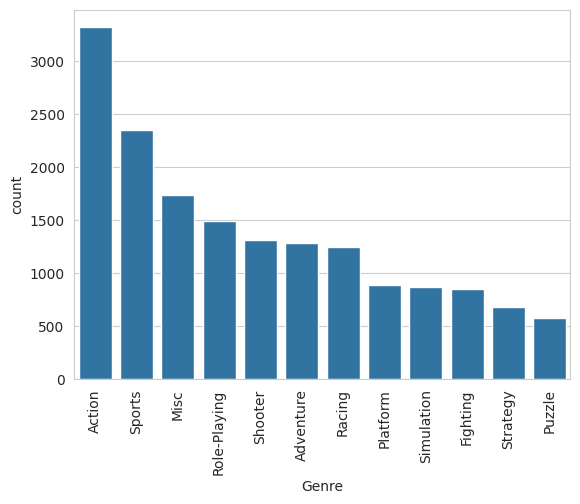

In [ ]:
# 畫出直方圖用來顯示不同電玩總類的總數
Genre_num = data['Genre'].value_counts()

sns.countplot(data, x = 'Genre',order = Genre_num.index)
plt.xticks(rotation=90)
plt.show()

   Platform  count
4        DS   2163
16      PS2   2161
17      PS3   1329
26      Wii   1325
28     X360   1265
19      PSP   1213
15       PS   1196
13       PC    960
29       XB    824
6       GBA    822
7        GC    556
2       3DS    509
20      PSV    413
18      PS4    336
10      N64    319
23     SNES    239
30     XOne    213
21      SAT    173
27     WiiU    143
0      2600    133
11      NES     98
5        GB     98
3        DC     52
8       GEN     27
12       NG     12
22      SCD      6
25       WS      6
1       3DO      3
24     TG16      2
14     PCFX      1
9        GG      1


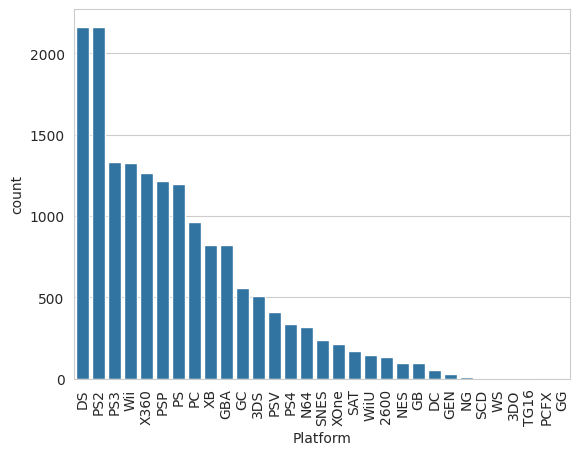

In [ ]:
#練習題
#畫出每個平台的遊戲數目
group = data.groupby(by= ['Platform']).size().reset_index(name='count')
group = group.sort_values(by = 'count', ascending=False)
print(group)
sns.countplot(data, x = 'Platform',order = group['Platform'])
plt.xticks(rotation=90)
plt.show()

                        Publisher  count
138               Electronic Arts   1351
21                     Activision    975
347            Namco Bandai Games    932
525                       Ubisoft    921
275  Konami Digital Entertainment    832
..                            ...    ...
403                     Playmates      1
404                      Playmore      1
405                        Plenty      1
406                   Pony Canyon      1
435                  SCS Software      1

[578 rows x 2 columns]


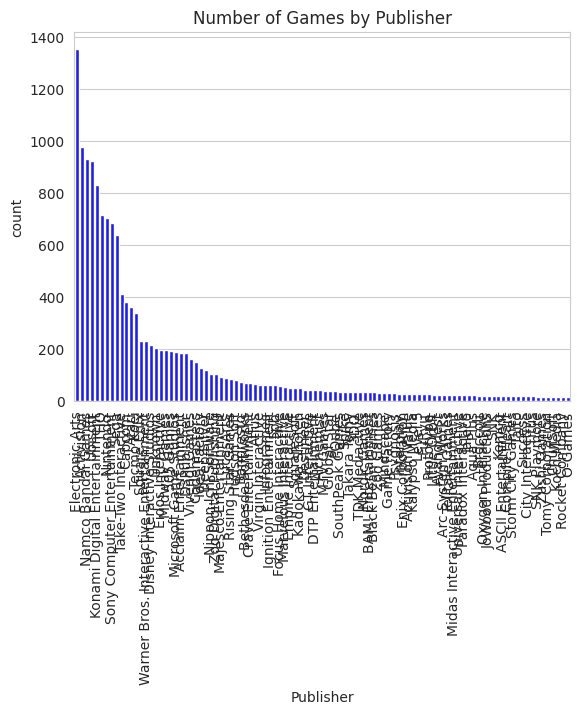

In [ ]:
#練習題
#畫出每個發行商的遊戲數目

group = data.groupby(by= ['Publisher']).size().reset_index(name='count')
group = group.sort_values(by = 'count', ascending=False)
print(group)
sns.countplot(data, x = 'Publisher',order = group['Publisher'][:100], color='b')
plt.xticks(rotation=90)
plt.title('Number of Games by Publisher')
plt.show()

# Publisher_num = data['Publisher'].value_counts()

# sns.countplot(data, x = 'Publisher',order = Publisher_num.index)
# plt.xticks(rotation=90)
# plt.show()

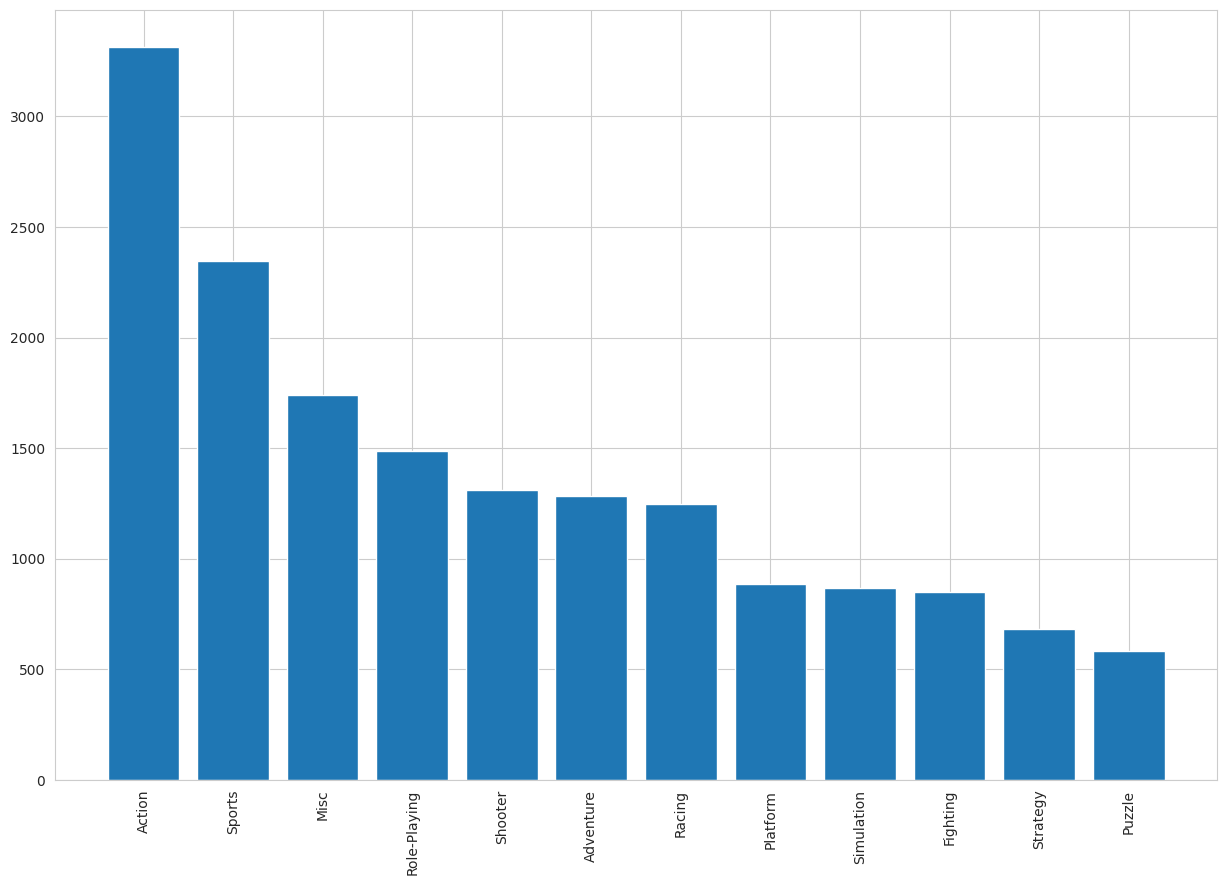

In [ ]:
# 畫出直方圖用來顯示不同電玩總類的總數 (限制使用 Matplotlib)
Genre_num = data['Genre'].value_counts()

plt.figure(figsize=(15, 10))
plt.bar(x = Genre_num.index,height = Genre_num)

plt.xticks(rotation=90)
plt.show()


# 每年的遊戲數目 countplot()

In [ ]:
# 統計每一年遊戲發行的總數
group = data.groupby(by= ['Year']).size().reset_index(name='count')
group

,Year,count
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


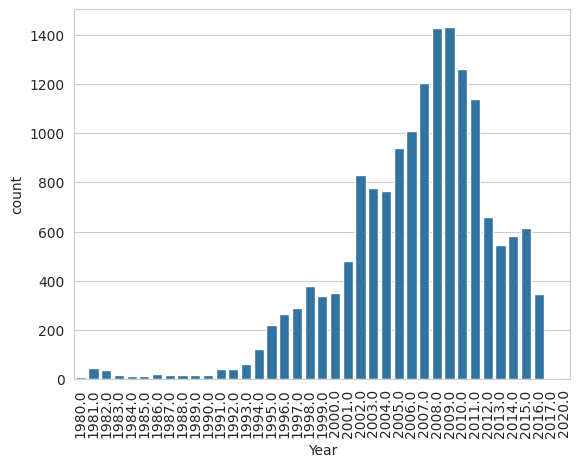

In [ ]:
# 畫出直方圖用來顯示每一年發行的遊戲數目
sns.countplot(data, x = 'Year')
plt.xticks(rotation=90)
plt.show()

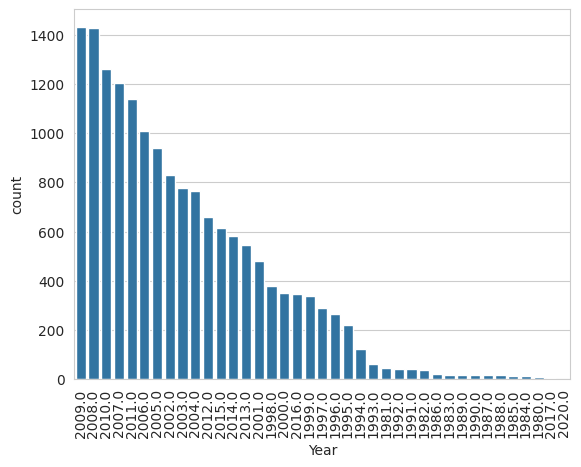

In [ ]:
# 將上面的直方圖根據發行遊戲數目來排序
# 提示 countplot() 中有個參數order可以用來限制X軸的順序
# 要先產生正確的Year順序當成order的資料
year_order = data['Year'].value_counts().sort_values(ascending=False)

# 繪製條形圖並根據排序的年份順序設置 order
sns.countplot(data=data, x='Year', order=year_order.index)
plt.xticks(rotation=90)
plt.show()

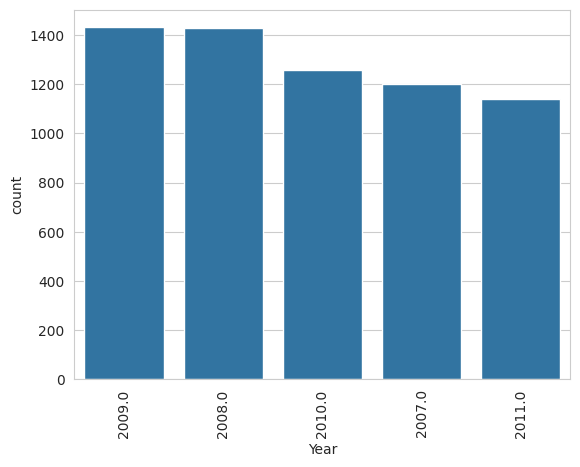

In [ ]:
# 根據上圖，但是只顯示前五個發行遊戲最多的年份
# plt.figure(figsize=(15, 10))
year_order = data['Year'].value_counts().sort_values(ascending=False)

# 繪製條形圖並根據排序的年份順序設置 order
sns.countplot(data=data, x='Year', order=year_order.index[:5])
plt.xticks(rotation=90)
plt.show()

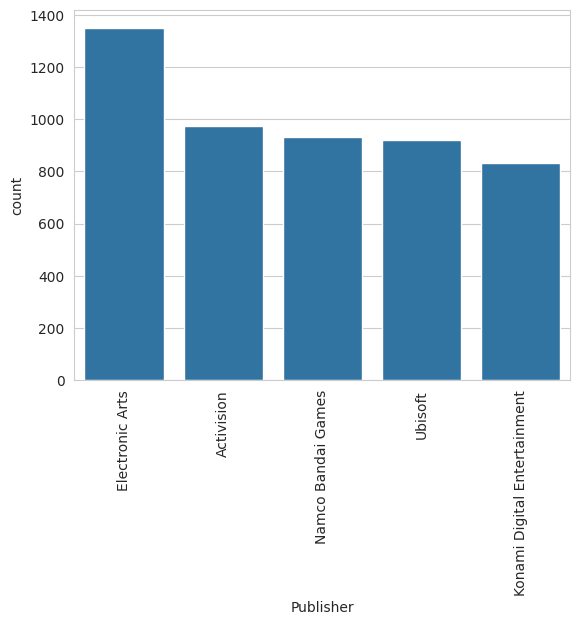

In [ ]:
# 練習題
# 畫出發行遊戲最多的前五名發行商
Publisher_order = data['Publisher'].value_counts().sort_values(ascending=False)

sns.countplot(data=data, x='Publisher', order=Publisher_order.index[:5])
plt.xticks(rotation=90)
plt.show()

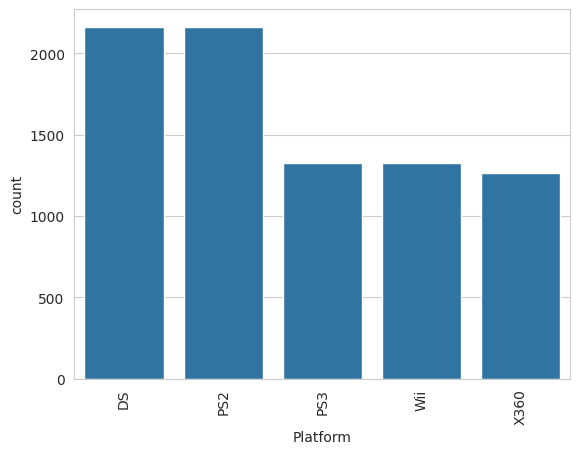

In [ ]:
# 練習題
# 畫出發行遊戲最多的前五種平台
Platform_order = data['Platform'].value_counts().sort_values(ascending=False)

sns.countplot(data=data, x='Platform', order=Platform_order.index[:5])
plt.xticks(rotation=90)
plt.show()

### 加入hue

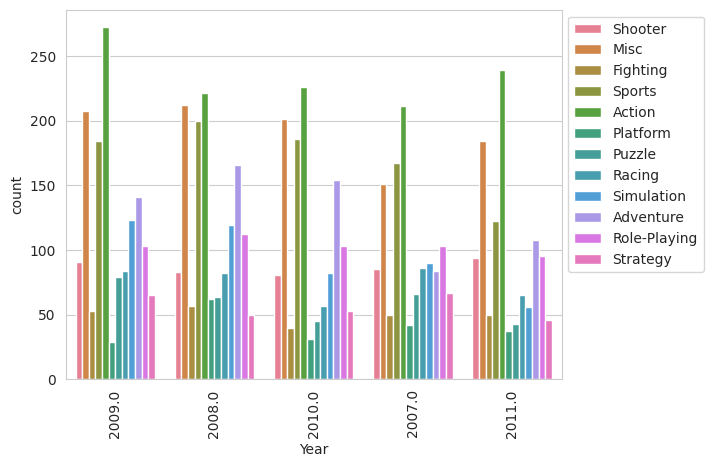

In [ ]:
# 畫出直方圖顯示：
# 發行電玩數量最多的前五年的數量
# 依據電玩種類分別顯示
year_order = data['Year'].value_counts().sort_values(ascending=False)

sns.countplot(data=data, x='Year', order=year_order.index[:5], hue = 'Genre')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

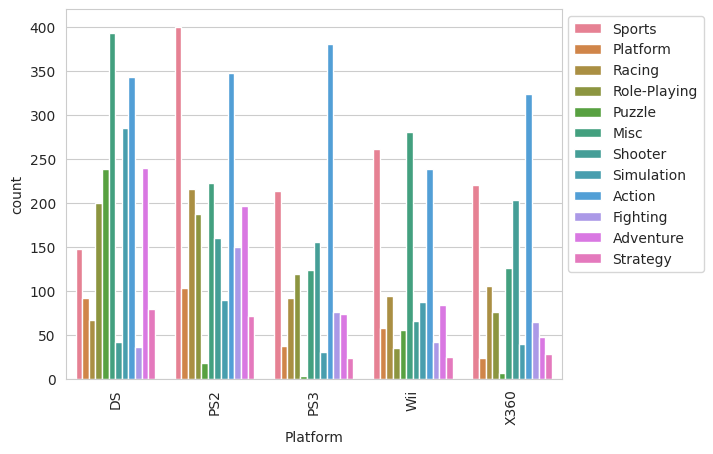

In [ ]:
#練習題
# 畫出直方圖顯示：
# 發行電玩數目最多的前五個平台
# 依據電玩種類分別顯示發行遊戲數目
Platform_order = data['Platform'].value_counts().sort_values(ascending=False)

sns.countplot(data=data, x='Platform', order=Platform_order.index[:5], hue = 'Genre')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

# 每年的遊戲銷售總量 barplot()

In [ ]:
# 計算每年遊戲的銷售總量
dgy = data.groupby(by= ['Year'])[['Global_Sales']].sum()
dgy

,Global_Sales
Year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36
1985.0,53.94
1986.0,37.07
1987.0,21.74
1988.0,47.22


<ipython-input-97-132ab4125a3a>:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clonedata['Year_Global_Sales'] = clonedata.groupby(by= ['Year'])[['Global_Sales']].transform(sum)


        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

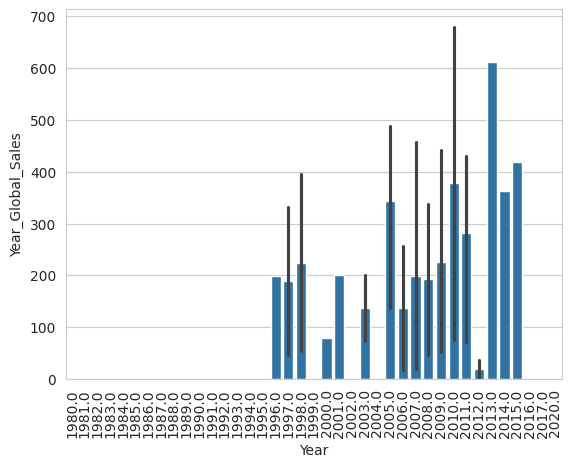

In [ ]:
# 計算每年遊戲的銷售總量
clonedata = data.copy()
clonedata['Year_Global_Sales'] = clonedata.groupby(by= ['Year'])[['Global_Sales']].transform(sum)
print(clonedata)
sns.barplot(data, x='Year', y='Year_Global_Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 將Year從索引重新變成欄位
dgy = data.groupby(by= ['Year'])[['Global_Sales']].sum().reset_index()
dgy

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


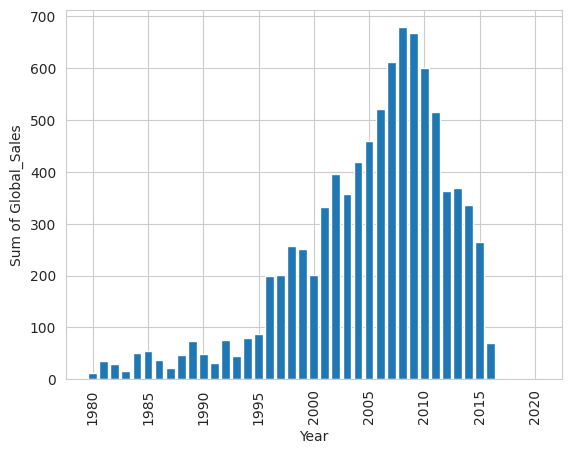

In [ ]:
#限制使用Matplotlib來畫出每年遊戲的銷售總量
plt.bar(dgy['Year'], dgy['Global_Sales'])
plt.xlabel('Year')
plt.ylabel('Sum of Global_Sales')
plt.xticks(rotation=90)
plt.show()


<ipython-input-106-0f5ca22e5b24>:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clonedata['Year_Global_Sales'] = clonedata.groupby(by= ['Year'])[['Global_Sales']].transform(sum)


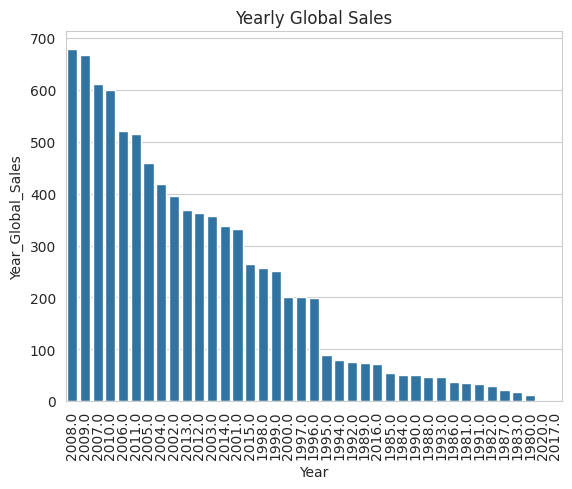

In [ ]:
# 將上圖依照全年銷售額來排序

clonedata = data.copy()
clonedata['Year_Global_Sales'] = clonedata.groupby(by= ['Year'])[['Global_Sales']].transform(sum)
Year_Global_Sales_order = clonedata.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False).index
sns.barplot(clonedata, x='Year', y='Year_Global_Sales' ,order = Year_Global_Sales_order)
plt.xticks(rotation=90)
plt.title('Yearly Global Sales')
plt.show()

<ipython-input-110-0ddb37544765>:5: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clonedata['Platform_Sales'] = clonedata.groupby(by= ['Platform'])[['Global_Sales']].transform(sum)


        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

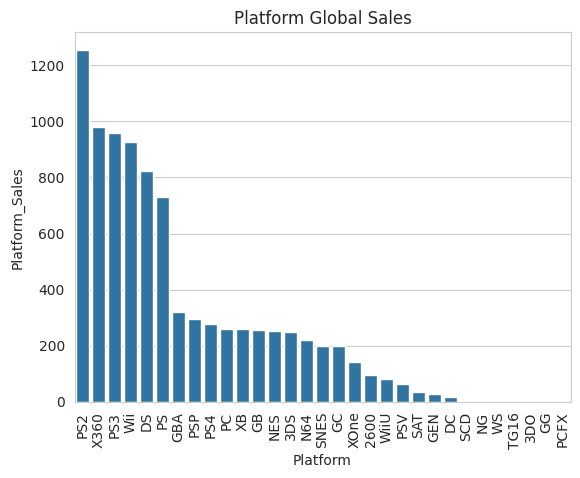

In [ ]:
#練習題
#請畫出各平台的銷售總額

clonedata = data.copy()
clonedata['Platform_Sales'] = clonedata.groupby(by= ['Platform'])[['Global_Sales']].transform(sum)
print(clonedata)
Platform_Sales_order = clonedata.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).index
sns.barplot(clonedata, x='Platform', y='Platform_Sales' ,order = Platform_Sales_order)
plt.xticks(rotation=90)
plt.title('Platform Global Sales')
plt.show()

<ipython-input-17-e84c28dc38c2>:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clonedata['NA_Genre_Sales'] = clonedata.groupby(by= ['Genre'])[['NA_Sales']].transform(sum)


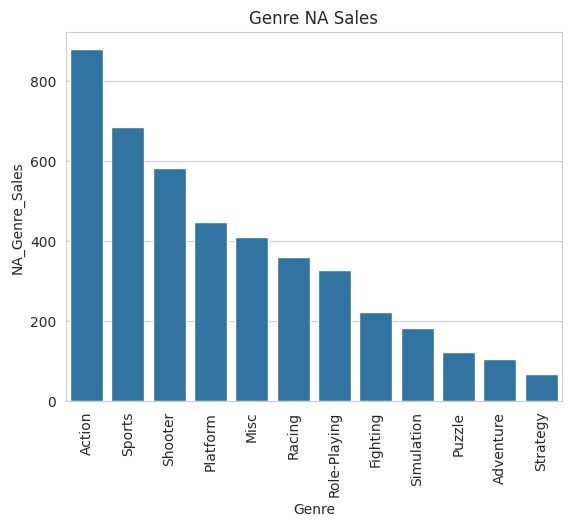

In [ ]:
#練習題
#請畫出各遊戲種類的北美銷售總額
clonedata = data.copy()
clonedata['NA_Genre_Sales'] = clonedata.groupby(by= ['Genre'])[['NA_Sales']].transform(sum)
#Genre_Sales_order = clonedata.sort_values(by='NA_Genre_Sales', ascending=False).index
Genre_Sales_order = clonedata.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).index
#print(clonedata)
sns.barplot(clonedata, x='Genre', y='NA_Genre_Sales' ,order = Genre_Sales_order)
plt.xticks(rotation=90)
plt.title('Genre NA Sales')
plt.show()

<ipython-input-132-851462d57440>:5: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clonedata['eu_na_Sales'] = clonedata.groupby(by= ['Platform'])[['eu_na_Sales']].transform(sum)


        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

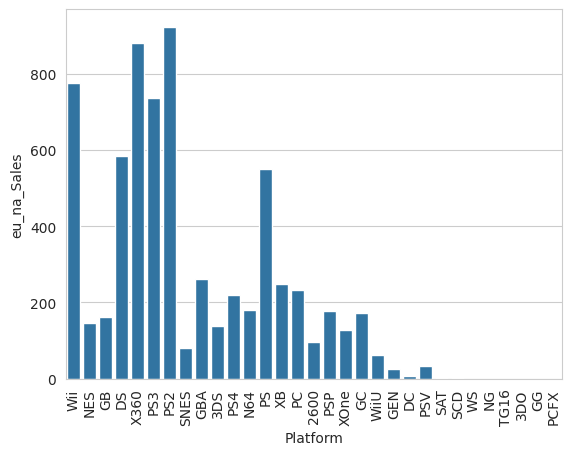

In [ ]:
#練習題
#請畫出各遊戲發行商的北美加歐洲銷售總額
clonedata = data.copy()
clonedata['eu_na_Sales'] = clonedata['EU_Sales'] + clonedata['NA_Sales']
clonedata['eu_na_Sales'] = clonedata.groupby(by= ['Platform'])[['eu_na_Sales']].transform(sum)
print(clonedata)
sns.barplot(clonedata, x='Platform', y='eu_na_Sales')
plt.xticks(rotation=90)
plt.show()

## 每年分別哪一種遊戲種類的發行數目最多？

In [ ]:
# 根據 年份與遊戲種類 來做群組，並計算每個群組的總數
data.groupby(by = ['Year','Genre']).size().reset_index(name='Game numer')


,Year,Genre,Game numer
0,1980.0,Action,1
1,1980.0,Fighting,1
2,1980.0,Misc,4
3,1980.0,Shooter,2
4,1980.0,Sports,1
...,...,...,...
384,2016.0,Sports,38
385,2016.0,Strategy,10
386,2017.0,Action,1
387,2017.0,Role-Playing,2


In [ ]:
# 依據年份的不同，計算每年中遊戲種類數量最多的那個數量
year_max_df = data.groupby(['Year','Genre']).size().reset_index(name='Game numer')
year_max_df['max_count'] = year_max_df.groupby(['Year'])['Game numer'].transform(max)
max_fil = year_max_df['Game numer']==year_max_df['max_count']
year_max_df[max_fil]

<ipython-input-26-1601c31d42e0>:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_max_df['max_count'] = year_max_df.groupby(['Year'])['Game numer'].transform(max)


,Year,Genre,Game numer,max_count
2,1980.0,Misc,4,4
5,1981.0,Action,25,25
12,1982.0,Action,18,18
19,1983.0,Action,7,7
29,1984.0,Puzzle,3,3
30,1984.0,Racing,3,3
31,1984.0,Shooter,3,3
35,1985.0,Platform,4,4
36,1985.0,Puzzle,4,4
40,1986.0,Action,6,6


In [ ]:
#將上面的結束使用transform對應回去原本的資料表
year_max_df = data.groupby(['Year','Genre']).size().reset_index(name='Game numer')
year_max_df['max_count'] = year_max_df.groupby(['Year'])['Game numer'].transform(max)
max_fil = year_max_df['Game numer']==year_max_df['max_count']
year_max_df[max_fil]

In [ ]:
#找出year_max_df中那些資料的欄位'count'值與上面找出的最大值一樣
year_max_df = data.groupby(['Year','Genre']).size().reset_index(name='Game numer')
year_max_df['max_count'] = year_max_df.groupby(['Year'])['Game numer'].transform(max)
max_fil = year_max_df['Game numer']==year_max_df['max_count']
year_max_df[max_fil]

In [ ]:
#將上面的程式整合在一起
year_max_df = data.groupby(['Year','Genre']).size().reset_index(name='Game numer')
year_max_df['max_count'] = year_max_df.groupby(['Year'])['Game numer'].transform(max)
max_fil = year_max_df['Game numer']==year_max_df['max_count']
year_max_df2 = year_max_df[max_fil]
year_max_df2.drop_duplicates(subset=['Year','Genre'], keep='last')

<ipython-input-39-2457d20d7f84>:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_max_df['max_count'] = year_max_df.groupby(['Year'])['Game numer'].transform(max)


,Year,Genre,Game numer,max_count
2,1980.0,Misc,4,4
5,1981.0,Action,25,25
12,1982.0,Action,18,18
19,1983.0,Action,7,7
29,1984.0,Puzzle,3,3
30,1984.0,Racing,3,3
31,1984.0,Shooter,3,3
35,1985.0,Platform,4,4
36,1985.0,Puzzle,4,4
40,1986.0,Action,6,6


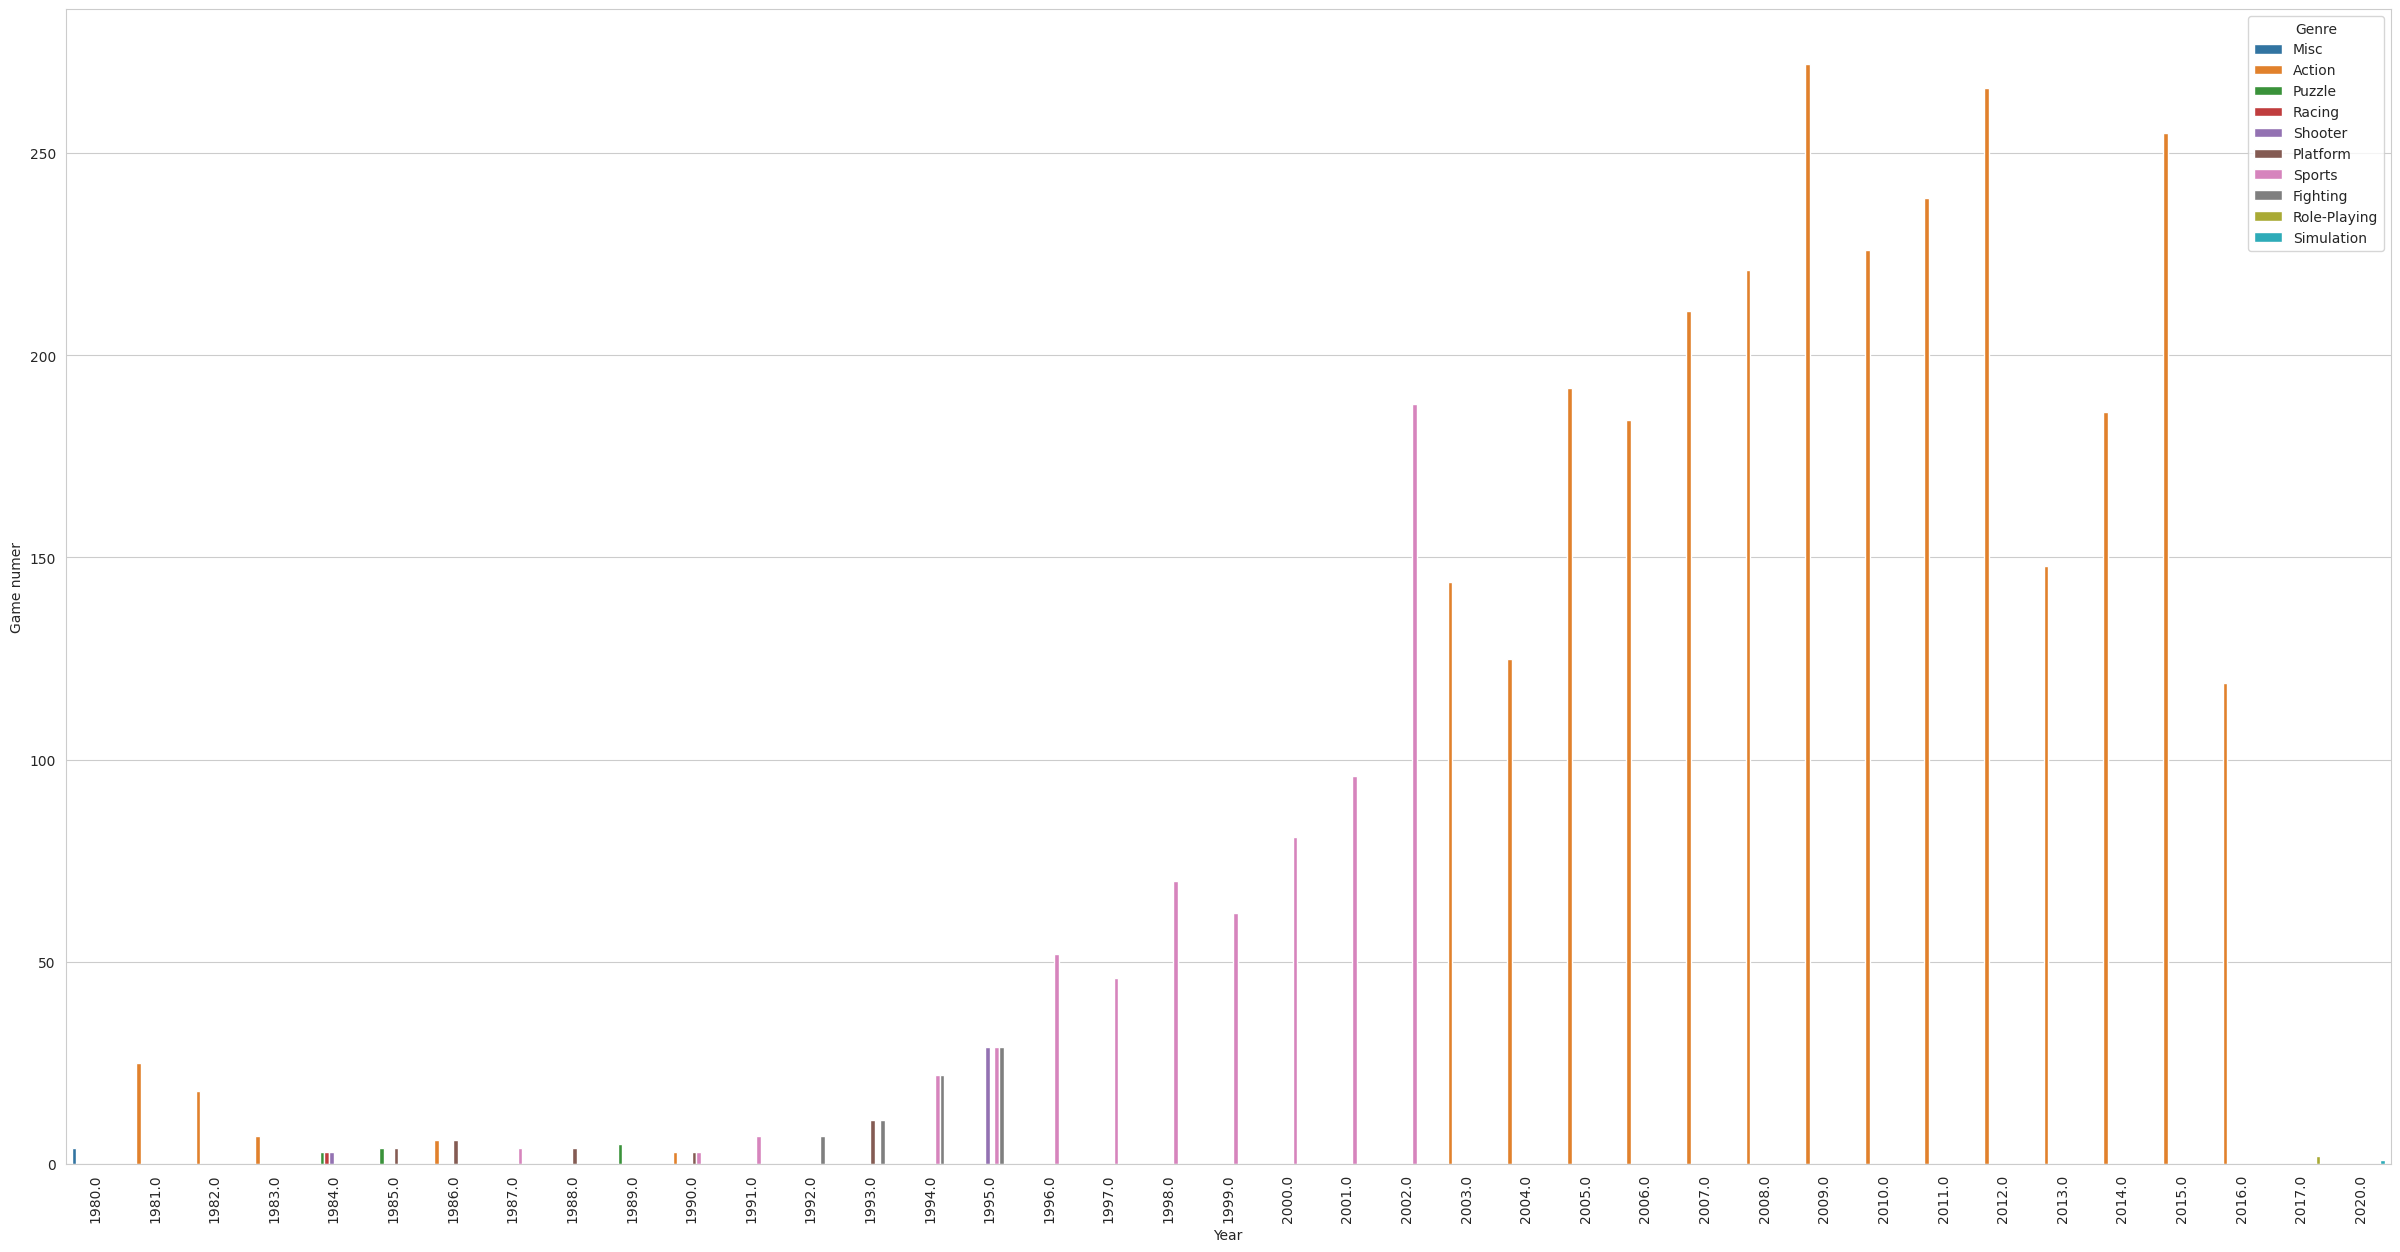

In [ ]:
# 使用直方圖來顯示上面表格的結果
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Game numer', data=year_max_df2, hue='Genre')
plt.xticks(rotation=90)
plt.show()

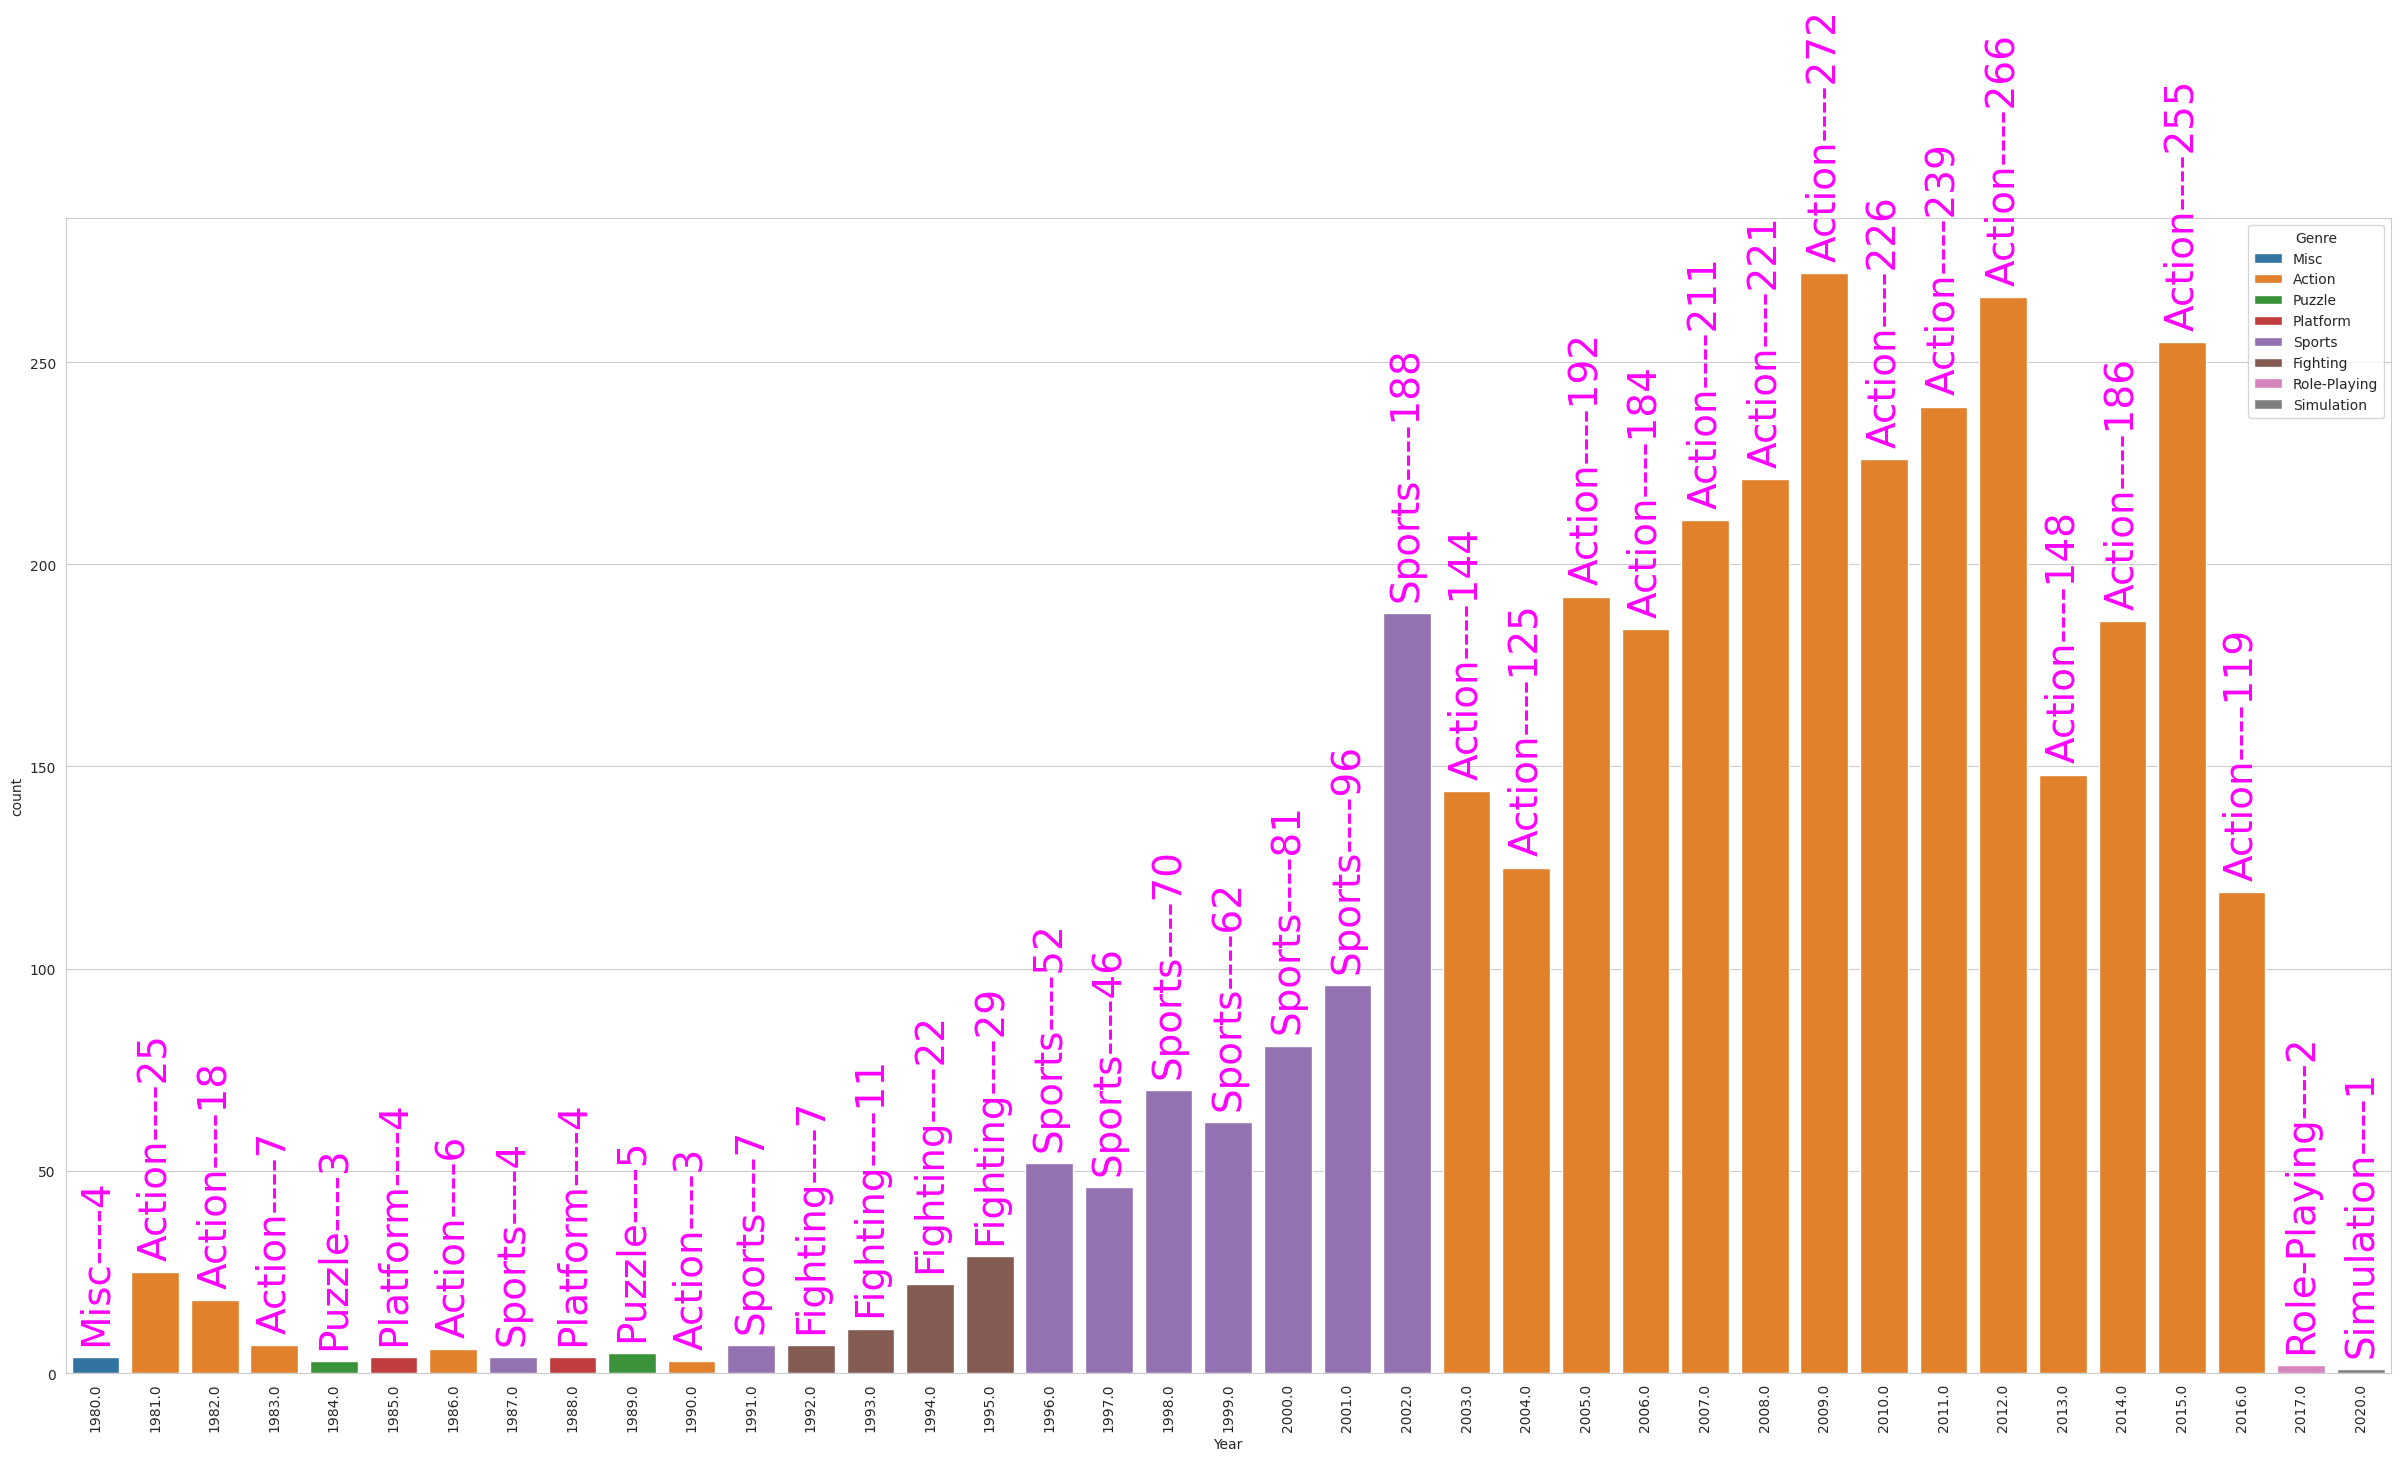

In [ ]:
# 解答版
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].idxmax()
year_max_genre = year_max_df.iloc[year_max_idx]#.reset_index(drop=True)
year_max_genre

# #因為每年可能會有不同類型的遊戲發行數目一樣，所以去除重複的
# year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last')
year_max_genre.head()

# 在每個直方圖條上用文字顯示對應的遊戲種類與數量
# 在每個直方圖條上用文字顯示對應的遊戲種類與數量
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre, hue='Genre')

#標示出每個直條代表的類型跟數目
genre = year_max_genre['Genre'].values
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value+5,
           str(genre[index] + '----' +str(value)),
           color='#FF00FF', size=28, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()


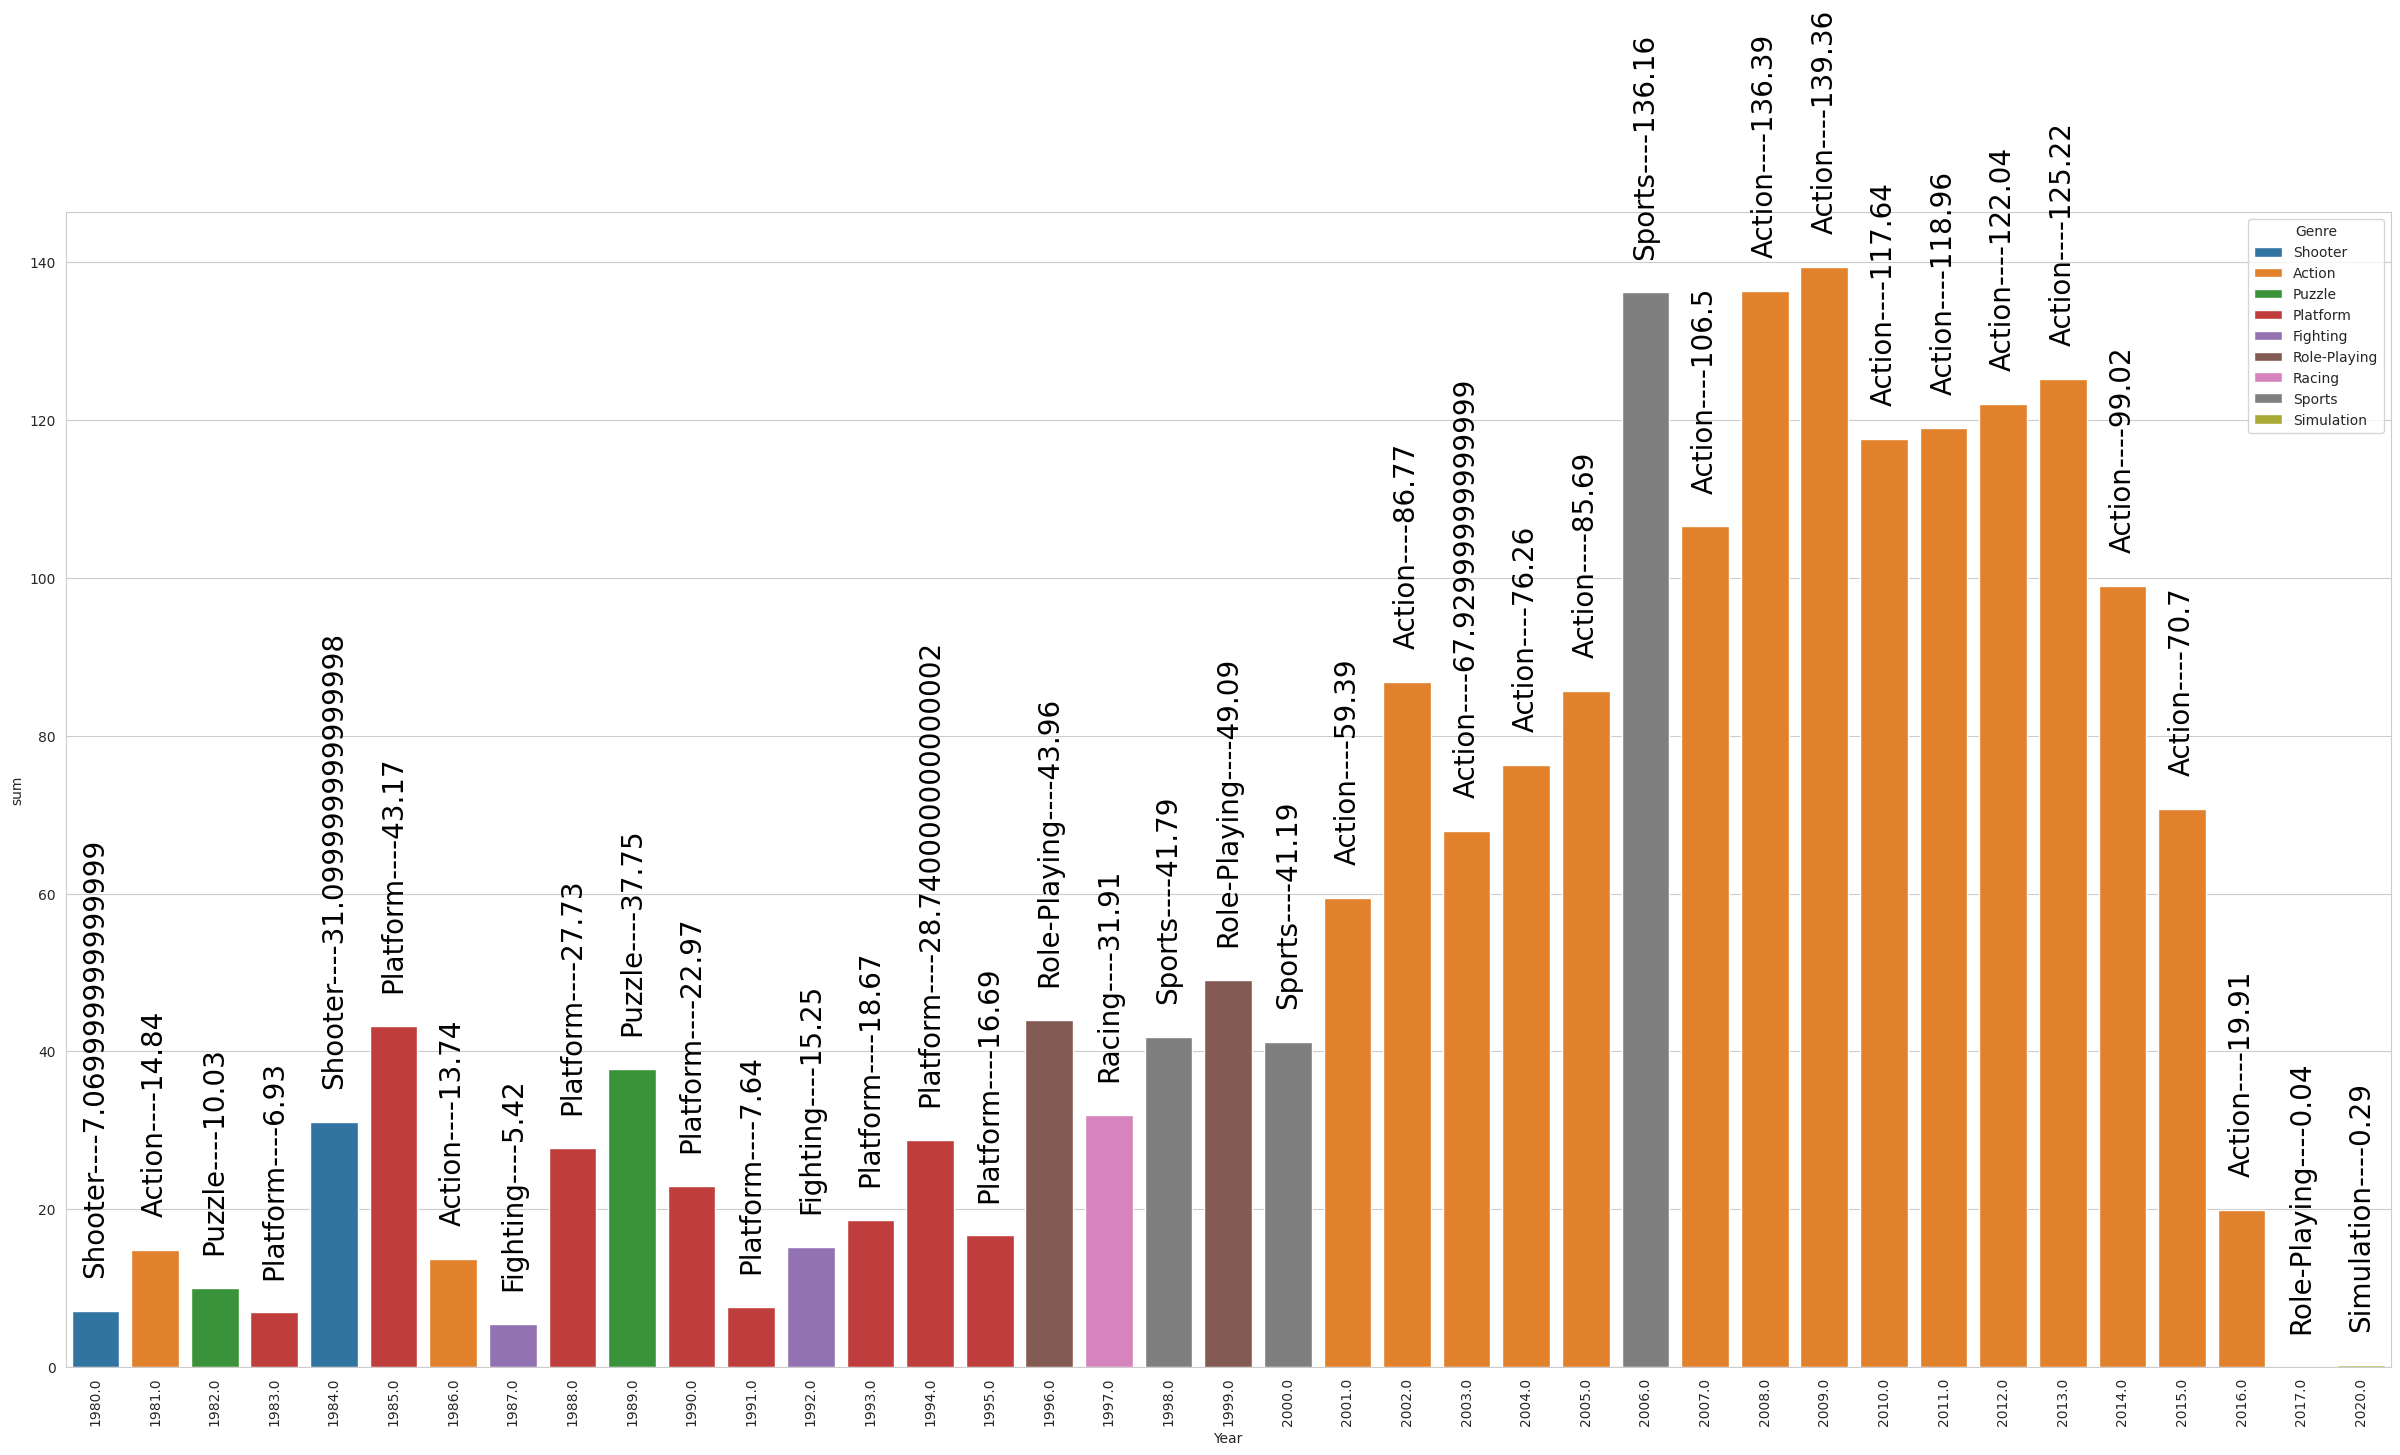

In [ ]:
# 使用直方圖畫出來
#將上面的程式整合在一起
year_max_df = data.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index(name='sum')
year_max_idx = year_max_df.groupby(['Year'])['sum'].idxmax()
year_max_genre = year_max_df.iloc[year_max_idx]#.reset_index(drop=True)

# 在每個直方圖條上用文字顯示對應的遊戲種類與數量
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='sum', data=year_max_genre, hue='Genre')
plt.xticks(rotation=90)
#標示出每個直條代表的類型跟數目
genre = year_max_genre['Genre'].values
index = 0
for value in year_max_genre['sum'].values:
    g.text(index, value+5,
           str(genre[index] + '----' +str(value)),
           color='#000000', size=20, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()


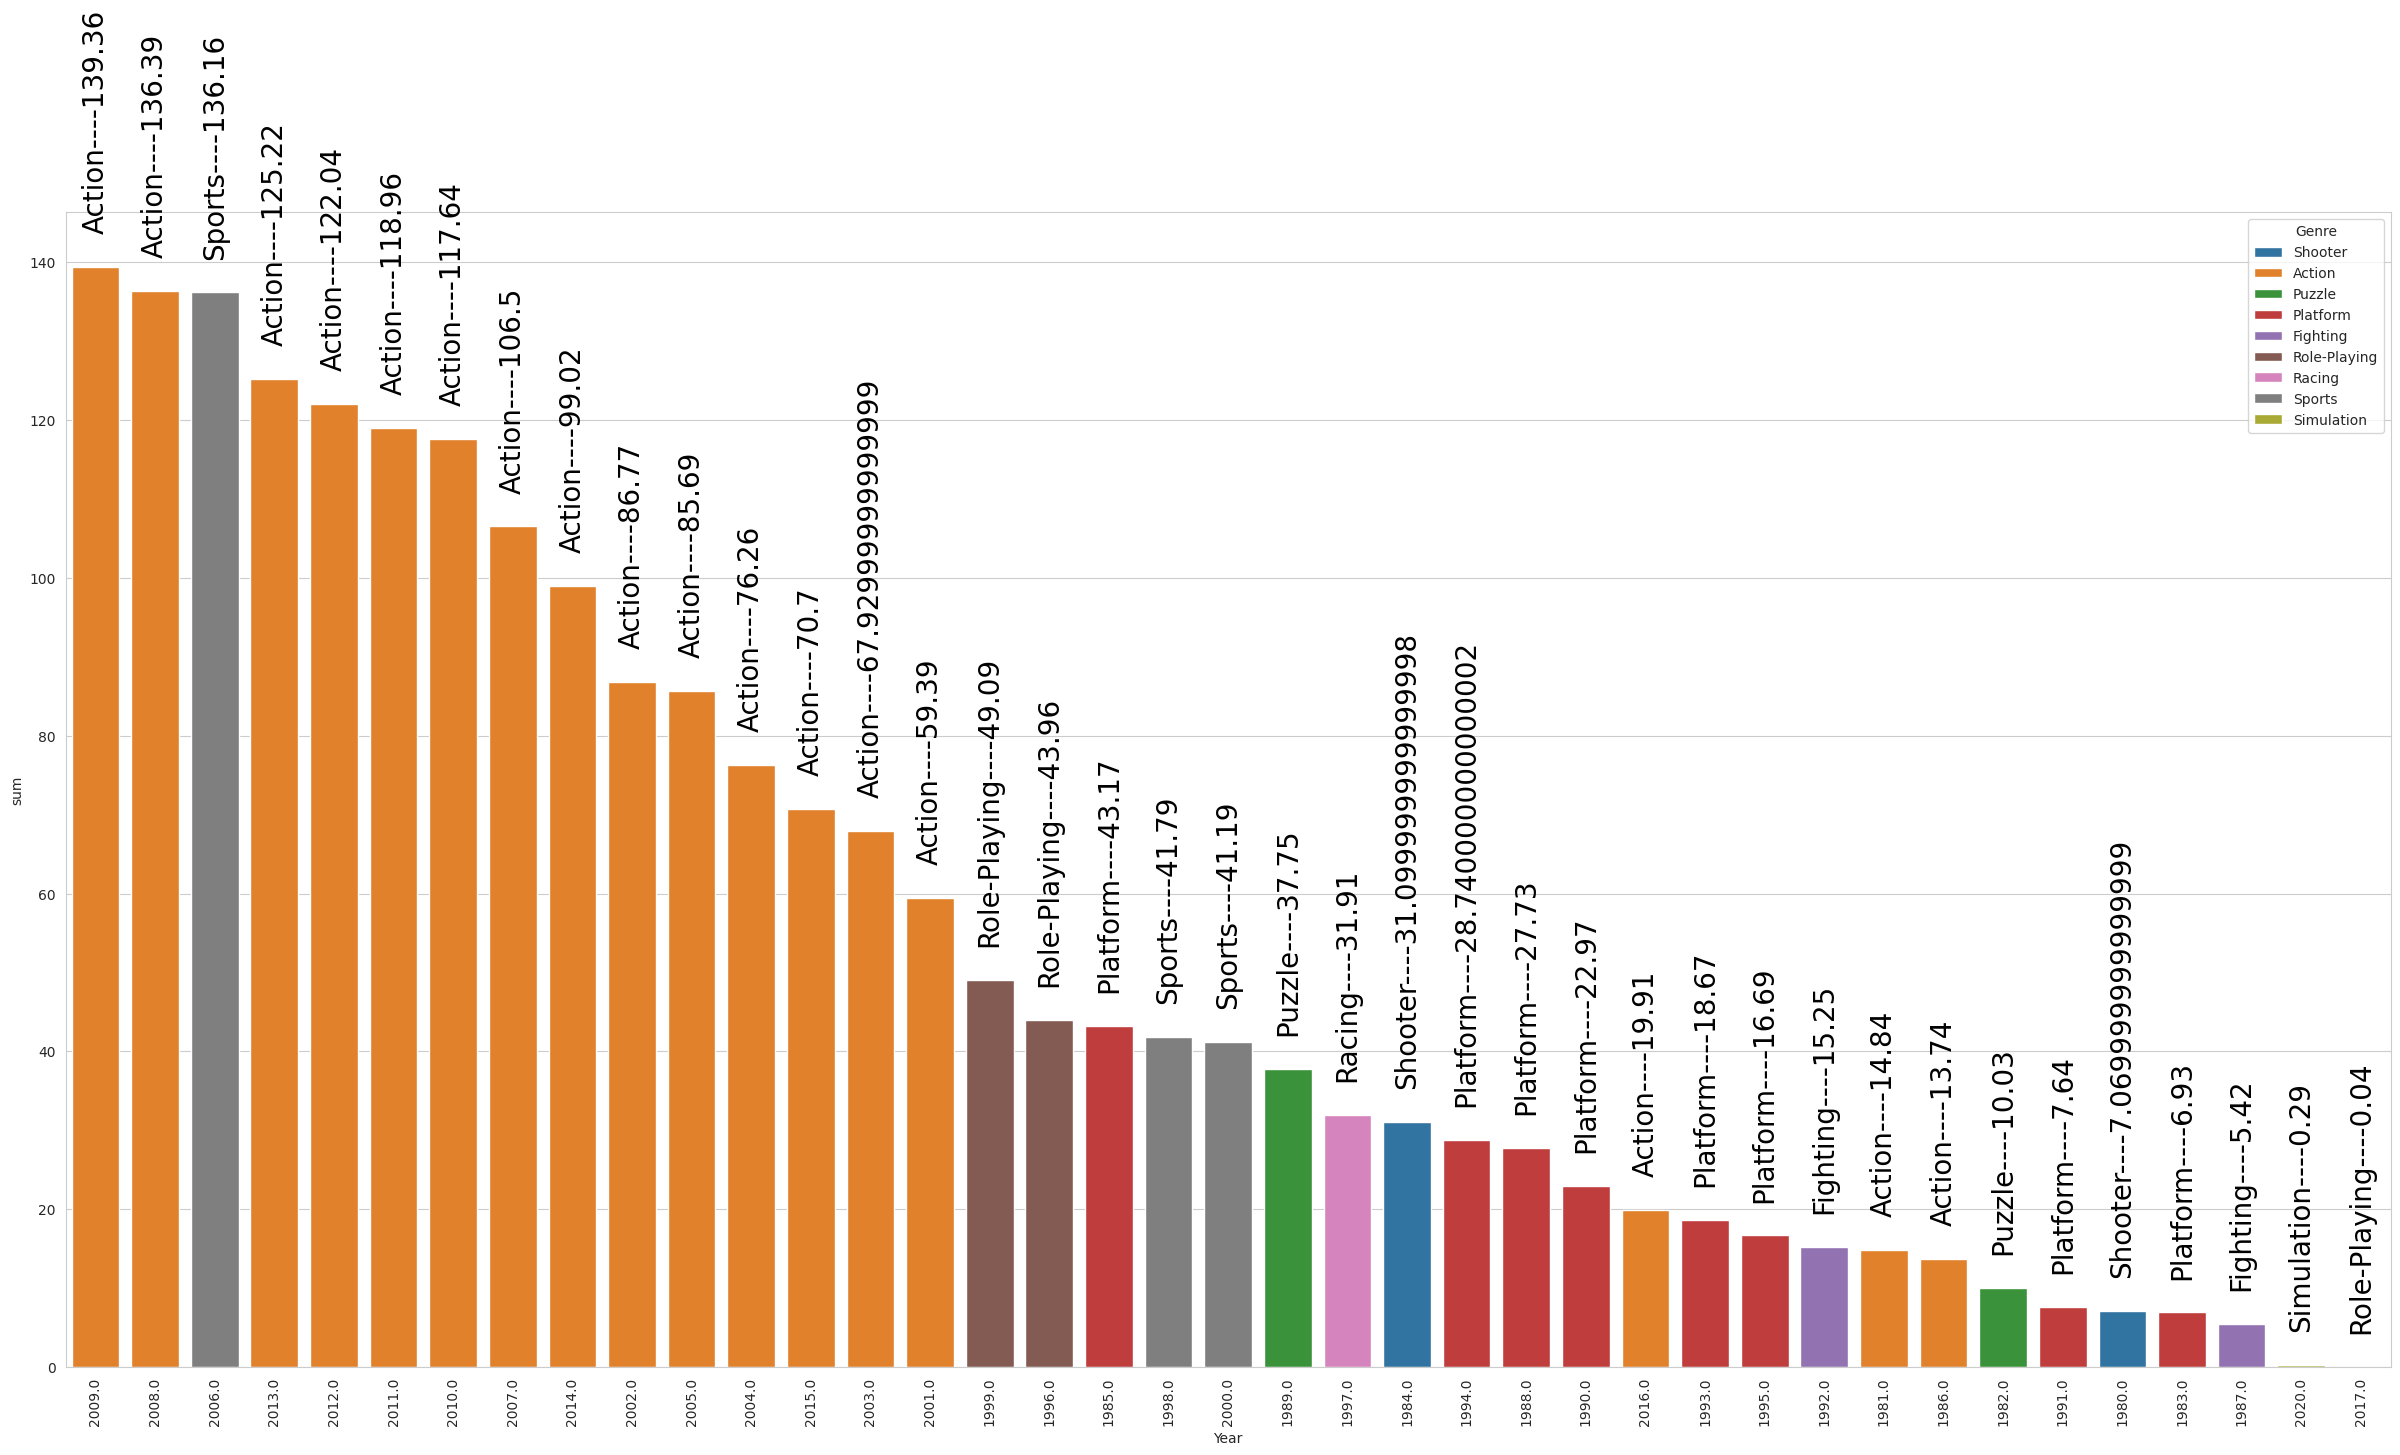

In [ ]:
# 練習題
# 請將上圖改成依照發行數目排序
year_max_df = data.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index(name='sum')
year_max_idx = year_max_df.groupby(['Year'])['sum'].idxmax()
year_max_genre = year_max_df.iloc[year_max_idx]#.reset_index(drop=True)

year_max_genre = year_max_genre.sort_values(by='sum', ascending=False)
year_max_genre_order = year_max_genre.sort_values(by='sum', ascending=False).Year


# 在每個直方圖條上用文字顯示對應的遊戲種類與數量
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='sum', data=year_max_genre, hue='Genre',order = year_max_genre_order)
plt.xticks(rotation=90)

# Reset index before the loop
index = 0
genre = year_max_genre['Genre'].values
for value in year_max_genre['sum'].values:
    g.text(index, value+5,
           str(genre[index] + '----' +str(value)),
           color='#000000', size=20, rotation= 90, ha="center")
    index += 1
plt.show()


In [ ]:
# 練習題
# 請計算每年哪一種平台的遊戲數目最多
year_max_df = data.groupby(['Year', 'Platform']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].idxmax()
year_max_genre = year_max_df.iloc[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.sort_values(by='count', ascending=False)


year_max_genre.head()

,Year,Platform,count
28,2008.0,DS,492
29,2009.0,DS,405
27,2007.0,DS,377
30,2010.0,DS,326
22,2002.0,PS2,280


In [ ]:
# 練習題
# 請計算每一個平台，哪一年的遊戲數目最多

platform_max_df = data.groupby(['Platform', 'Year']).size().reset_index(name='count')
platform_max_idx = platform_max_df.groupby(['Platform'])['count'].idxmax()
platform_max_genre = platform_max_df.iloc[platform_max_idx].reset_index(drop=True)
platform_max_genre = platform_max_genre.sort_values(by='count', ascending=False)
platform_max_genre

,Platform,Year,count
4,DS,2008.0,492
26,Wii,2009.0,325
16,PS2,2002.0,280
15,PS,1998.0,248
17,PS3,2011.0,216
28,X360,2011.0,206
6,GBA,2002.0,198
19,PSP,2006.0,190
29,XB,2003.0,189
7,GC,2002.0,152


In [4]:
# 練習題
# 請計算每一個類型，哪一年的遊戲數目最多
Genre_max_df = data.groupby(['Genre', 'Year']).size().reset_index(name='count')
Genre_max_idx = Genre_max_df.groupby(['Genre'])['count'].idxmax()
Genre_max_year = Genre_max_df.iloc[Genre_max_idx].reset_index(drop=True)
Genre_max_year = Genre_max_year.sort_values(by='count', ascending=False)
Genre_max_year

,Genre,Year,count
0,Action,2009.0,272
3,Misc,2008.0,212
10,Sports,2008.0,200
1,Adventure,2008.0,166
9,Simulation,2009.0,123
7,Role-Playing,2008.0,112
6,Racing,2003.0,109
8,Shooter,2005.0,96
4,Platform,2003.0,87
5,Puzzle,2009.0,79


## 每年哪一種電玩種類的銷售數量最多？

In [5]:
# 根據 年份 跟 遊戲種類來進行群組，並計算每個群組的全球銷售總額
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale_dx

,Year,Genre,Global_Sales
0,1980.0,Action,0.34
1,1980.0,Fighting,0.77
2,1980.0,Misc,2.71
3,1980.0,Shooter,7.07
4,1980.0,Sports,0.49
...,...,...,...
384,2016.0,Sports,14.60
385,2016.0,Strategy,0.50
386,2017.0,Action,0.01
387,2017.0,Role-Playing,0.04


In [20]:
# 根據年份分別找出該年份中那些遊戲種類的銷售總額是最大的
Genre_sale_max_df = data.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index(name='sum')
Genre_sale_max_idx = Genre_sale_max_df.groupby(['Year'])['sum'].idxmax()
Genre_sale_max_year = Genre_sale_max_df.iloc[Genre_sale_max_idx].reset_index(drop=True)
Genre_sale_max_year = Genre_sale_max_year.sort_values(by='sum', ascending=False)
Genre_sale_max_year

,Year,Genre,sum
29,2009.0,Action,139.36
28,2008.0,Action,136.39
26,2006.0,Sports,136.16
33,2013.0,Action,125.22
32,2012.0,Action,122.04
31,2011.0,Action,118.96
30,2010.0,Action,117.64
27,2007.0,Action,106.50
34,2014.0,Action,99.02
22,2002.0,Action,86.77


In [21]:
#將上面的程式整合在一起
Genre_sale_max_df = data.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index(name='sum')
Genre_sale_max_idx = Genre_sale_max_df.groupby(['Year'])['sum'].idxmax()
Genre_sale_max_year = Genre_sale_max_df.iloc[Genre_sale_max_idx].reset_index(drop=True)
Genre_sale_max_year = Genre_sale_max_year.sort_values(by='sum', ascending=False)
Genre_sale_max_year

,Year,Genre,sum
29,2009.0,Action,139.36
28,2008.0,Action,136.39
26,2006.0,Sports,136.16
33,2013.0,Action,125.22
32,2012.0,Action,122.04
31,2011.0,Action,118.96
30,2010.0,Action,117.64
27,2007.0,Action,106.50
34,2014.0,Action,99.02
22,2002.0,Action,86.77


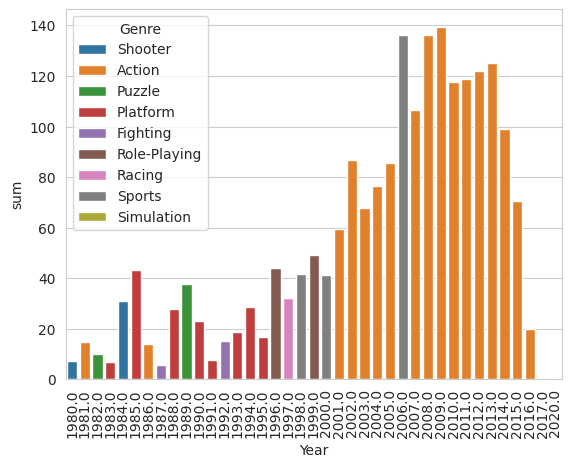

In [22]:
# 使用直方圖畫出來
sns.barplot(x='Year', y='sum', data=Genre_sale_max_year, hue='Genre')
plt.xticks(rotation=90)
plt.show()

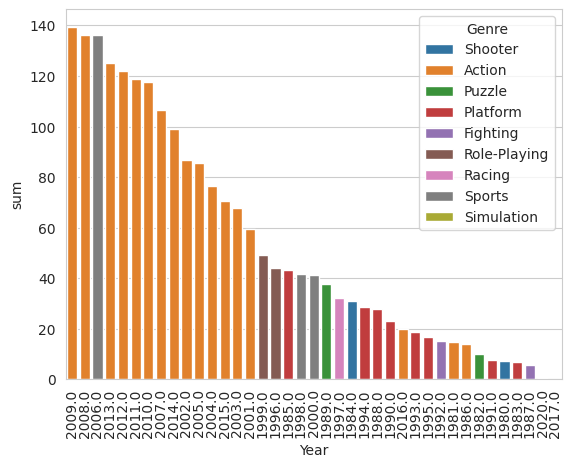

In [23]:
# 練習題
# 請將上圖改成依照銷售數量排序
Genre_sale_max_year_order = Genre_sale_max_year.Year

sns.barplot(x='Year', y='sum', data=Genre_sale_max_year, hue='Genre',order = Genre_sale_max_year_order)
plt.xticks(rotation=90)
plt.show()

In [25]:
# 練習題
# 請計算每年哪一種平台的遊戲銷售量最多
Platform_sale_max_df = data.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index(name='sum')
Platform_sale_max_idx = Platform_sale_max_df.groupby(['Year'])['sum'].idxmax()
Platform_sale_max_year = Platform_sale_max_df.iloc[Platform_sale_max_idx].reset_index(drop=True)
Platform_sale_max_year = Platform_sale_max_year.sort_values(by='sum', ascending=False)
Platform_sale_max_year

,Year,Platform,sum
24,2004.0,PS2,211.78
29,2009.0,Wii,210.44
22,2002.0,PS2,205.40
23,2003.0,PS2,184.29
28,2008.0,Wii,174.16
30,2010.0,X360,171.05
18,1998.0,PS,169.58
21,2001.0,PS2,166.43
25,2005.0,PS2,160.65
31,2011.0,PS3,159.37


In [27]:
# 練習題
# 請計算每一個平台，哪一年的遊戲銷售量最多
Year_sale_max_df = data.groupby(['Platform', 'Year'])['Global_Sales'].sum().reset_index(name='sum')
Year_sale_max_idx = Year_sale_max_df.groupby(['Platform'])['sum'].idxmax()
Year_sale_max_Platform = Year_sale_max_df.iloc[Year_sale_max_idx].reset_index(drop=True)
Year_sale_max_Platform = Year_sale_max_Platform.sort_values(by='sum', ascending=False)
Year_sale_max_Platform

,Platform,Year,sum
16,PS2,2004.0,211.78
26,Wii,2009.0,210.44
28,X360,2010.0,171.05
15,PS,1998.0,169.58
17,PS3,2011.0,159.37
4,DS,2007.0,149.36
18,PS4,2015.0,115.30
6,GBA,2004.0,78.09
29,XB,2004.0,65.50
5,GB,1989.0,64.98


In [26]:
# 練習題
# 請計算每一個平台，哪類型的遊戲銷售量最多
Genre_sale_max_df = data.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index(name='sum')
Genre_sale_max_idx = Genre_sale_max_df.groupby(['Platform'])['sum'].idxmax()
Genre_sale_max_Platform = Genre_sale_max_df.iloc[Genre_sale_max_idx].reset_index(drop=True)
Genre_sale_max_Platform = Genre_sale_max_Platform.sort_values(by='sum', ascending=False)
Genre_sale_max_Platform

,Platform,Genre,sum
17,PS3,Action,307.88
26,Wii,Sports,292.06
28,X360,Shooter,278.55
16,PS2,Sports,273.41
4,DS,Misc,137.76
15,PS,Action,127.05
11,NES,Platform,95.78
5,GB,Role-Playing,88.24
18,PS4,Action,87.06
6,GBA,Platform,78.30


## 哪一種遊戲全球的銷售總數量最高？

In [28]:
# 根據遊戲種類進行群組，個別計算全球銷售總數
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
data_genre.head()

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37


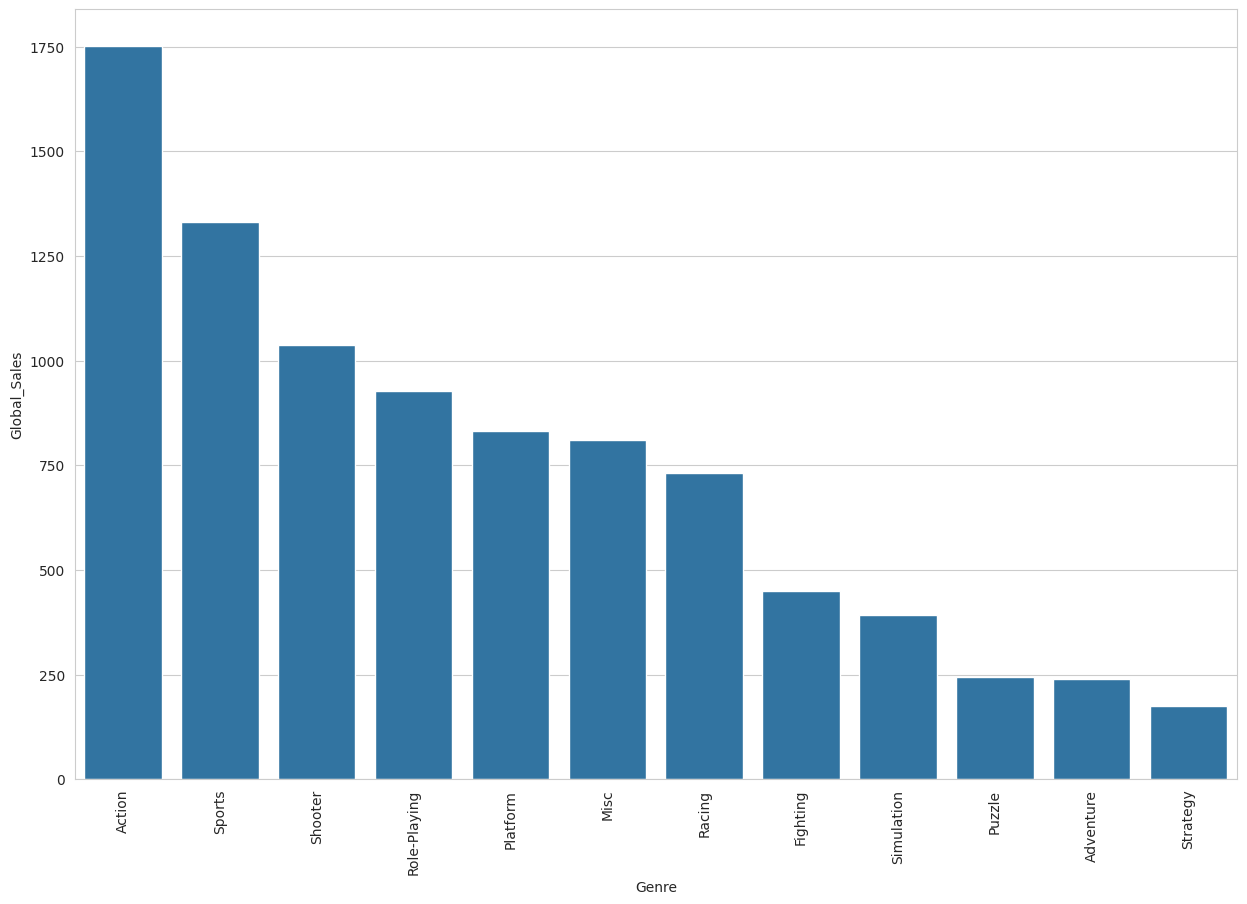

In [ ]:
# 將上面的資料畫出來
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)
plt.show()

In [32]:
#練習題
#哪一個開發商在日本地區的銷售總數最高
data_Publisher = data.groupby(by=['Publisher'])['JP_Sales'].sum().reset_index(name = 'JP_Sales_Total')
data_Publisher = data_Publisher.sort_values(by=['JP_Sales_Total'], ascending=False)
data_Publisher.head(1)

,Publisher,JP_Sales_Total
359,Nintendo,455.42


In [36]:
#練習題
#哪一個平台在北美與歐洲地區的銷售總數最高
data['NA_EU_Sales'] = data['NA_Sales'] + data['EU_Sales']
data_Platform = data.groupby(by=['Platform'])['NA_EU_Sales'].sum().reset_index(name = 'NA_EU_Sales_Total')

data_Platform = data_Platform.sort_values(by=['NA_EU_Sales_Total'], ascending=False)
data_Platform.head(1)

,Platform,NA_EU_Sales_Total
16,PS2,923.13


## 全球銷售數量前20大遊戲

In [38]:
# 全球銷售數量前20大遊戲
# top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
top_game_sale = data.head(20) #資料已經是全球銷售數量排序過了，所以直接取前20筆
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales','Platform']]

top_game_sale

,Name,Year,Genre,Global_Sales,Platform
0,Wii Sports,2006.0,Sports,82.74,Wii
1,Super Mario Bros.,1985.0,Platform,40.24,NES
2,Mario Kart Wii,2008.0,Racing,35.82,Wii
3,Wii Sports Resort,2009.0,Sports,33.00,Wii
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.37,GB
5,Tetris,1989.0,Puzzle,30.26,GB
6,New Super Mario Bros.,2006.0,Platform,30.01,DS
7,Wii Play,2006.0,Misc,29.02,Wii
8,New Super Mario Bros. Wii,2009.0,Platform,28.62,Wii
9,Duck Hunt,1984.0,Shooter,28.31,NES


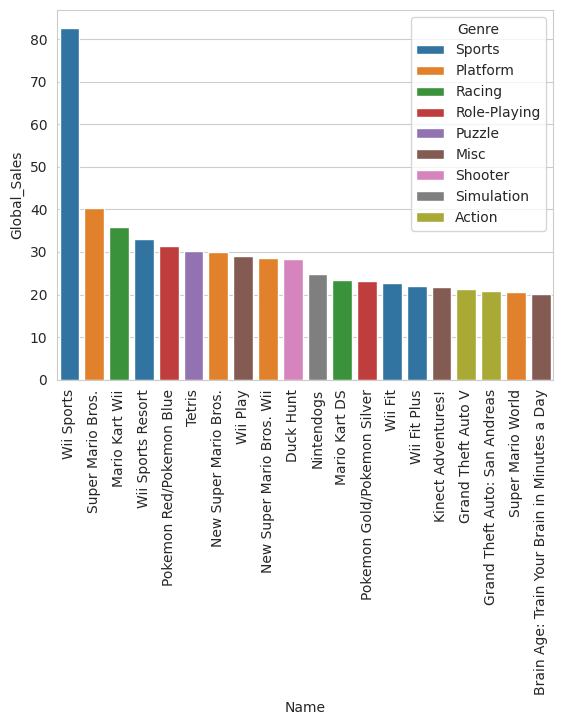

In [39]:
# 使用直方圖把上面的資料畫出來
sns.barplot(x="Name", y="Global_Sales", data=top_game_sale, hue = 'Genre')
plt.xticks(rotation=90)
plt.show()

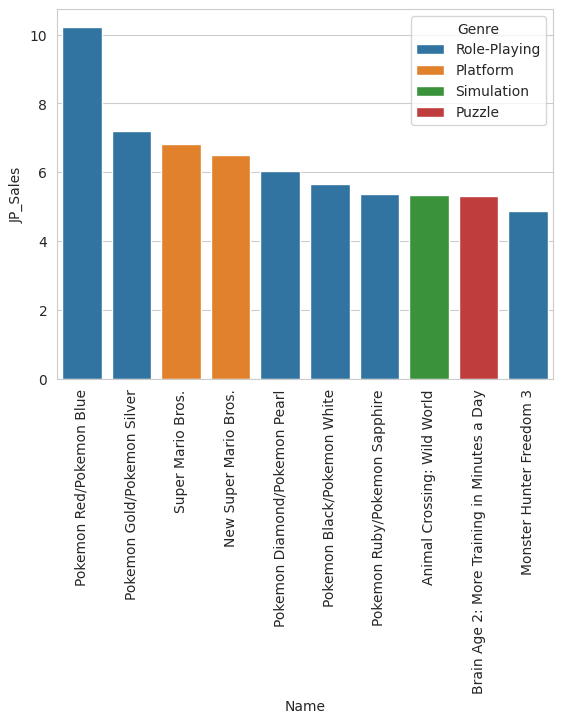

In [42]:
#練習題
#請畫出日本地區銷售數量前10名的遊戲
topjp_game_sale = data.sort_values(by=['JP_Sales'], ascending=False).head(10)

sns.barplot(x="Name", y="JP_Sales", data=topjp_game_sale, hue = 'Genre')
plt.xticks(rotation=90)
plt.show()

                        Publisher  Publisher_JP_Sales
359                      Nintendo              455.42
347            Namco Bandai Games              127.07
275  Konami Digital Entertainment               91.30
456   Sony Computer Entertainment               74.10
85                         Capcom               68.08
446                          Sega               57.03
465                   Square Enix               49.88
466                    SquareSoft               40.13
144              Enix Corporation               32.40
500                    Tecmo Koei               29.21


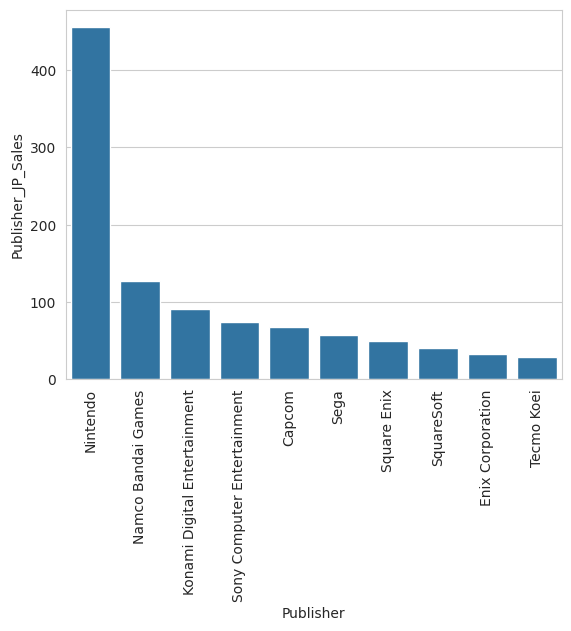

In [46]:
#練習題
#請畫出日本地區銷售數量前10名的遊戲公司
topjp_game_sale = data.groupby(by = 'Publisher')['JP_Sales'].sum().reset_index(name = 'Publisher_JP_Sales')

topjp_game_sale_publisher = topjp_game_sale.sort_values(by=['Publisher_JP_Sales'], ascending=False).head(10)
print(topjp_game_sale_publisher)
sns.barplot(x="Publisher", y="Publisher_JP_Sales", data=topjp_game_sale_publisher)
plt.xticks(rotation=90)
plt.show()

## 比較各區域不同遊戲種類的銷售數量

In [50]:
# 取出 遊戲總類 與 四個銷售地區 的欄位資料成為 新表格
genre_sale_dx = data[['Genre', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
genre_sale_dx

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Sports,41.49,29.02,3.77,8.46
1,Platform,29.08,3.58,6.81,0.77
2,Racing,15.85,12.88,3.79,3.31
3,Sports,15.75,11.01,3.28,2.96
4,Role-Playing,11.27,8.89,10.22,1.00
...,...,...,...,...,...
16593,Platform,0.01,0.00,0.00,0.00
16594,Shooter,0.01,0.00,0.00,0.00
16595,Racing,0.00,0.00,0.00,0.00
16596,Puzzle,0.00,0.01,0.00,0.00


In [53]:
# 根據上面的表格，以遊戲種類為群組，每個群組計算四個不同地區分別的銷售總合
genre_sale_dx.groupby(by= 'Genre').aggregate(sum)

<ipython-input-53-78c9afd96065>:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  genre_sale_dx.groupby(by= 'Genre').aggregate(sum)


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.83,525.00,159.95,187.38
Adventure,105.80,64.13,52.07,16.81
Fighting,223.59,101.32,87.35,36.68
Misc,410.24,215.98,107.76,75.32
Platform,447.05,201.63,130.77,51.59
Puzzle,123.78,50.78,57.31,12.55
Racing,359.42,238.39,56.69,77.27
Role-Playing,327.28,188.06,352.31,59.61
Shooter,582.60,313.27,38.28,102.69


<ipython-input-61-5eecaf5160e5>:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sns.heatmap(genre_sale_dx.groupby(by= 'Genre').aggregate(sum), cmap= 'coolwarm', annot=True, fmt = '.1f')


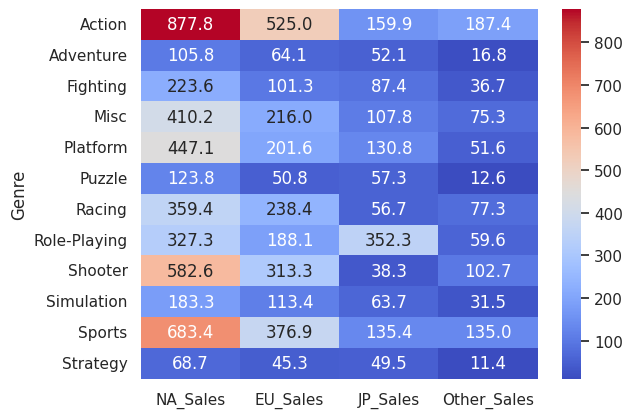

In [61]:
# 使用HeatMAP畫出上面表格
# 提示 sns.heatmap()
sns.heatmap(genre_sale_dx.groupby(by= 'Genre').aggregate(sum), cmap= 'coolwarm', annot=True, fmt = '.1f')
plt.show()

<ipython-input-59-bfa10b829639>:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  map = genre_sale_dx.groupby(by= 'Genre').aggregate(sum)


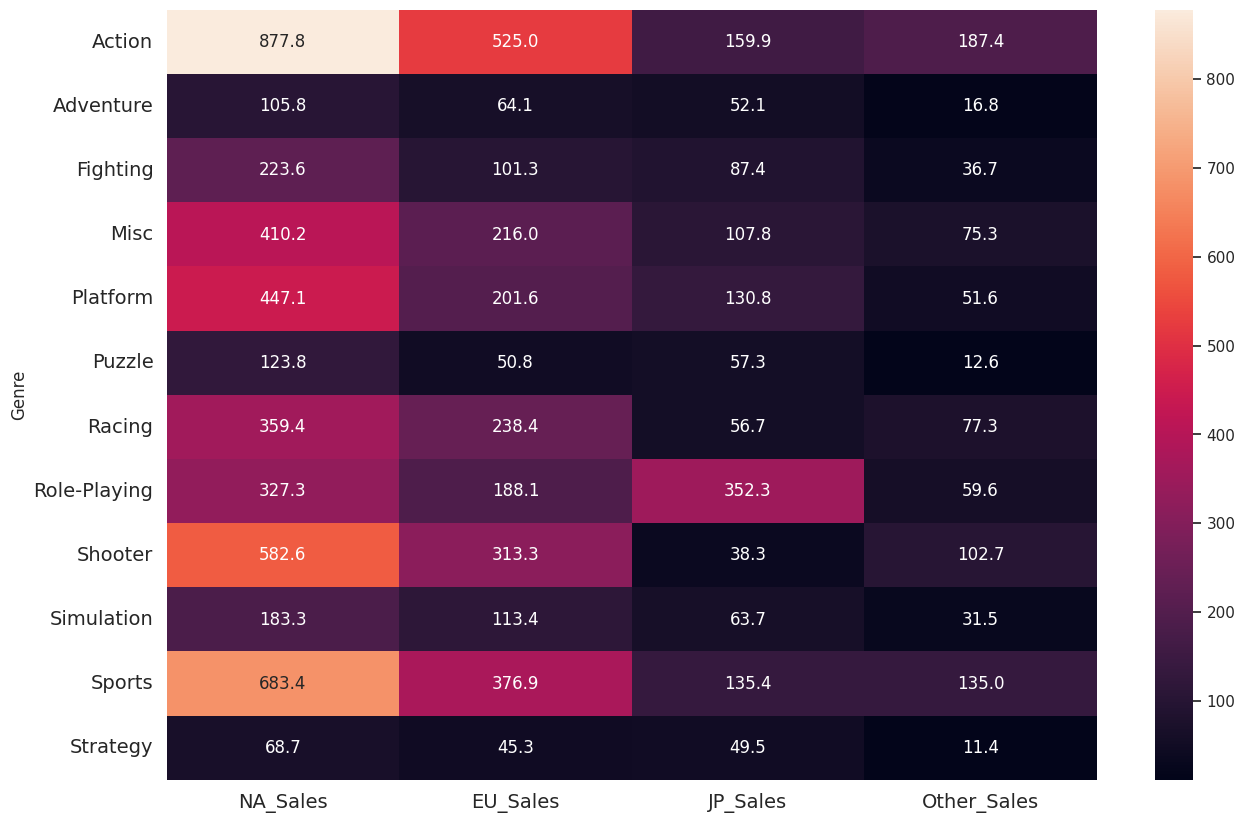

In [59]:
#解答
# 使用HeatMAP畫出上面表格
# 提示 sns.heatmap()
map = genre_sale_dx.groupby(by= 'Genre').aggregate(sum)
plt.figure(figsize=(15, 10))
sns.set(font_scale=1) #設定字型的縮放比例
sns.heatmap(map, annot=True, fmt = '.1f') #熱圖
plt.xticks(fontsize=14) #X座標字型
plt.yticks(fontsize=14) #Y座標字型
plt.show()

### 問題：從上圖能看出哪些結論？
北美是銷售額最多的地區

北美的銷售類型排行:動作類、運動類、射擊類

動作類是所有種類的銷售大宗

日本喜好特別不同,角色扮演特別好

<ipython-input-67-38b058ecf5f9>:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Platform_sale_dx = Platform_sale_dx.groupby(by= 'Platform').aggregate(sum)


          NA_Sales  EU_Sales  JP_Sales  Other_Sales
Platform                                           
2600         90.60      5.47      0.00         0.91
3DO           0.00      0.00      0.10         0.00
3DS          78.87     58.52     97.35        12.63
DC            5.43      1.69      8.56         0.27
DS          390.71    194.65    175.57        60.53
GB          114.32     47.82     85.12         8.20
GBA         187.54     75.25     47.33         7.73
GC          133.46     38.71     21.58         5.18
GEN          19.27      5.52      2.67         0.89
GG            0.00      0.00      0.04         0.00
N64         139.02     41.06     34.22         4.38
NES         125.94     21.15     98.65         5.31
NG            0.00      0.00      1.44         0.00
PC           93.28    139.68      0.17        24.86
PCFX          0.00      0.00      0.03         0.00
PS          336.51    213.60    139.82        40.91
PS2         583.84    339.29    139.20       193.44
PS3         

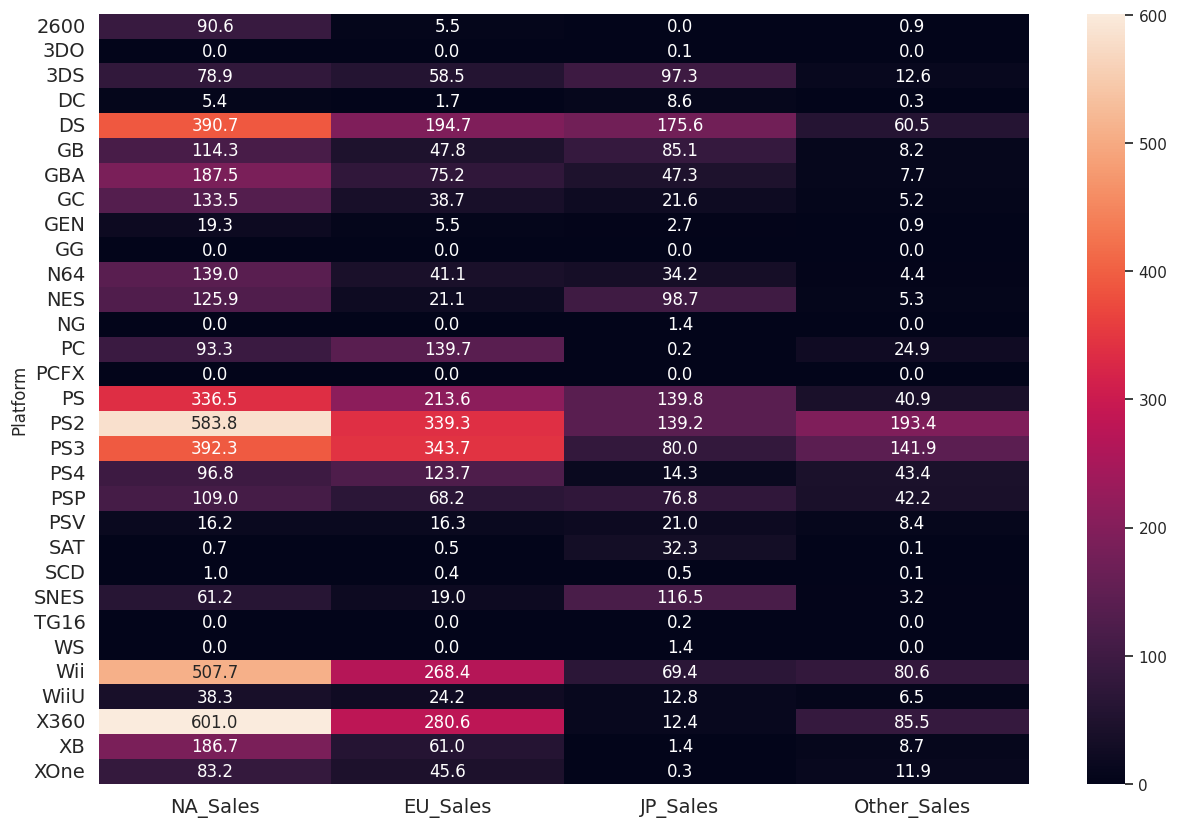

In [67]:
#練習題
#畫出不同平台各區域的銷售數量熱圖
Platform_sale_dx = data[['Platform', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
Platform_sale_dx = Platform_sale_dx.groupby(by= 'Platform').aggregate(sum)
print(Platform_sale_dx)
plt.figure(figsize=(15, 10))
sns.set(font_scale=1) #設定字型的縮放比例
sns.heatmap(Platform_sale_dx, annot=True, fmt = '.1f') #熱圖
plt.xticks(fontsize=14) #X座標字型
plt.yticks(fontsize=14) #Y座標字型
plt.show()

# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量

### Pandas melt() 示範

In [68]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_table = comp_map.reset_index()

# pd.melt會將一個DataFrame拆解 key=欄位名稱, value=欄位值
comp_table = pd.melt(comp_table, id_vars=['Genre'],
                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                var_name='Sale_Area', value_name='Sale_Price')
comp_table

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,877.83
1,Adventure,NA_Sales,105.80
2,Fighting,NA_Sales,223.59
3,Misc,NA_Sales,410.24
4,Platform,NA_Sales,447.05
5,Puzzle,NA_Sales,123.78
6,Racing,NA_Sales,359.42
7,Role-Playing,NA_Sales,327.28
8,Shooter,NA_Sales,582.60
9,Simulation,NA_Sales,183.31


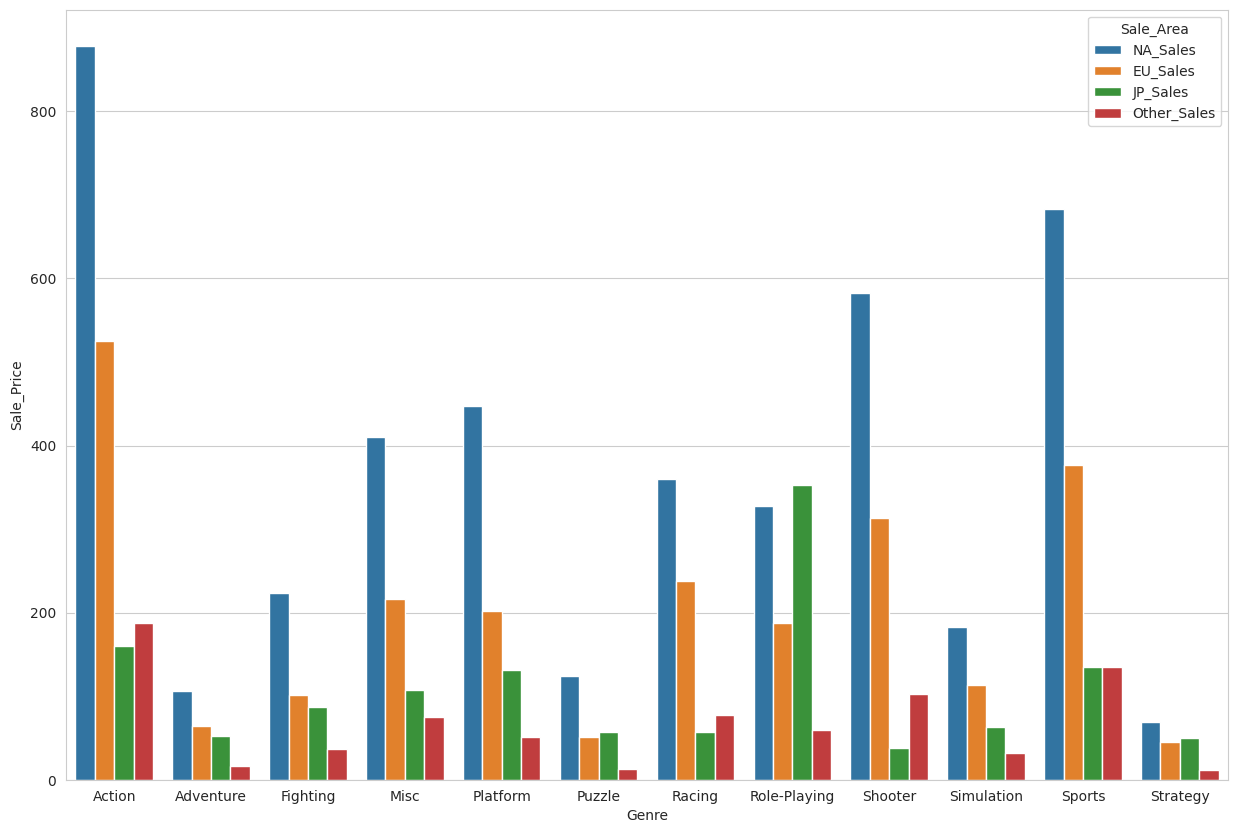

In [ ]:
# 根據上面的資料
# 使用直方圖畫出
# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量
# 提示 barplot(), hue 參數可以設為 Sale_Area
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.show()

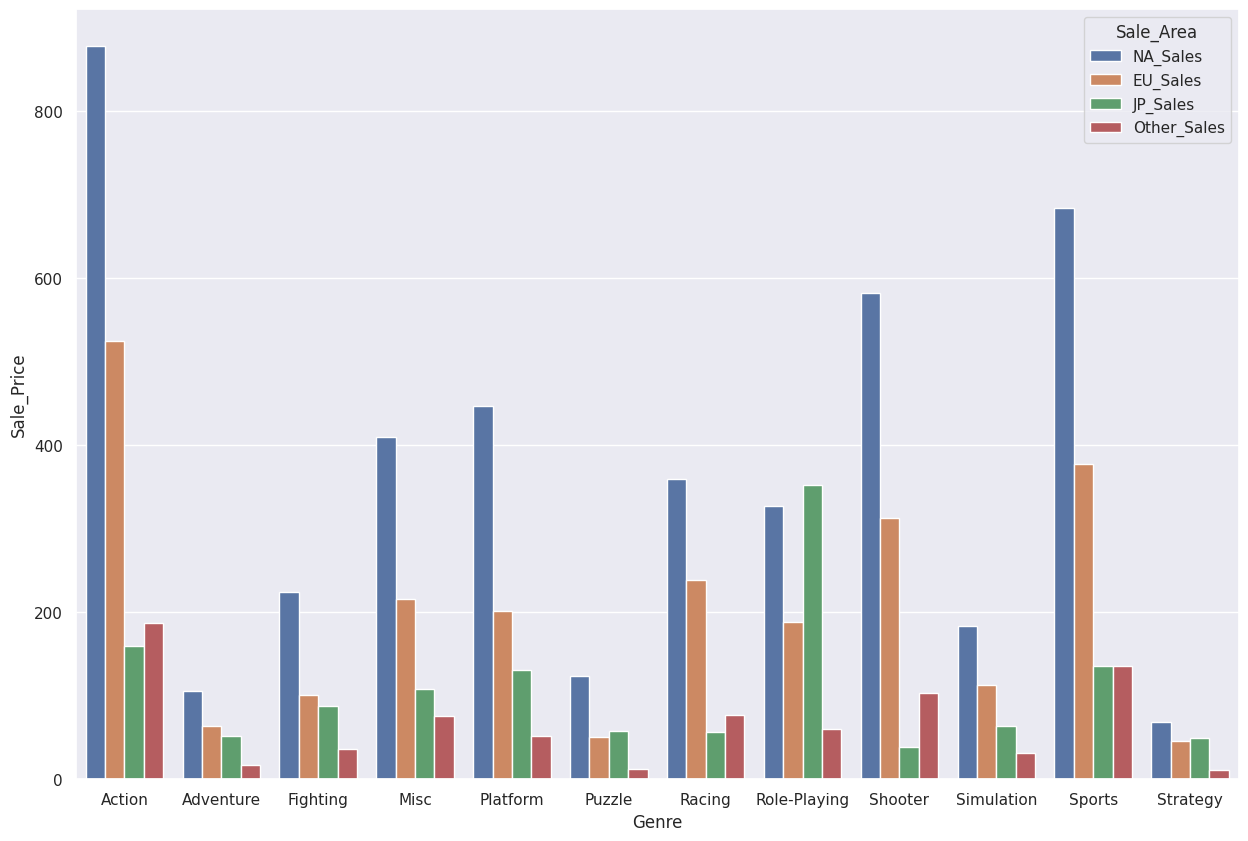

In [70]:
# 練習題
# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量

comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_table = comp_map.reset_index()

# pd.melt會將一個DataFrame拆解 key=欄位名稱, value=欄位值
comp_table = pd.melt(comp_table, id_vars=['Genre'],
                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                var_name='Sale_Area', value_name='Sale_Price')
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.show()

# 前20大開發商

In [63]:
#列出每個開發商的遊戲數目
top_publisher = data.groupby(by='Publisher').size().sort_values(ascending=False).reset_index(name='Amount')
top_publisher

,Publisher,Amount
0,Electronic Arts,1351
1,Activision,975
2,Namco Bandai Games,932
3,Ubisoft,921
4,Konami Digital Entertainment,832
...,...,...
573,Playmates,1
574,Playmore,1
575,Plenty,1
576,Pony Canyon,1


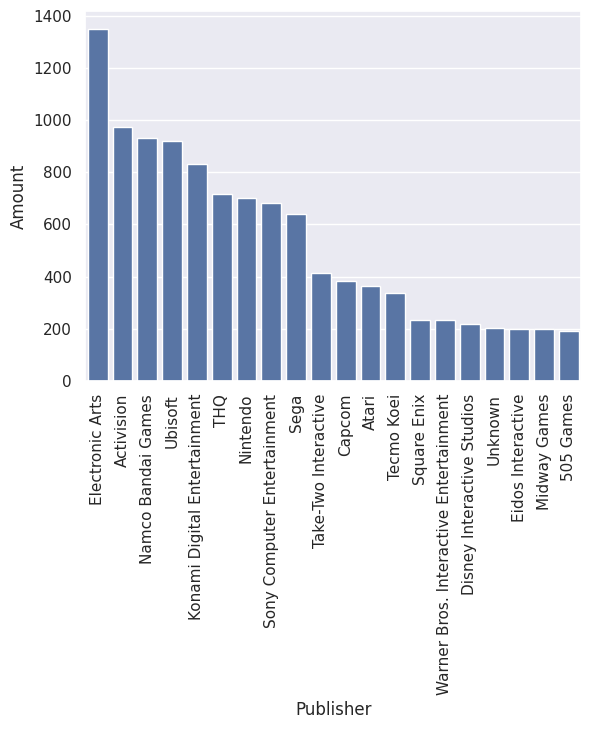

In [64]:
# 用直方圖畫出前20大開發商的遊戲數量
sns.barplot(x='Publisher', y='Amount', data=top_publisher.head(20))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 練習題
# 用直方圖畫出前5大平台的遊戲數量

# 各遊戲開發商的全球銷售總數量

In [ ]:
#列出每個開發商的全球銷售總數量


In [ ]:
# 根據上面資料畫出
# 各遊戲開發商的全球銷售總數量


### 問題：根據上面兩張圖比較各遊戲廠商在遊戲數量與銷售的排名有何不同？

In [ ]:
#練習題
#畫出全球銷售遊戲數量前10大的遊戲平台

# 每年遊戲數目最多的開發商

In [ ]:
# 計算每年分別是那些開發商的遊戲數目最多
year_max_df = data.groupby(['Year', 'Publisher']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].idxmax()
year_max_Publisher = year_max_df.iloc[year_max_idx].reset_index(drop=True)
year_max_Publisher = year_max_Publisher.sort_values(by='count', ascending=False)
year_max_Publisher

,Year,Publisher,count
29,2009.0,Activision,121
28,2008.0,Electronic Arts,120
25,2005.0,Electronic Arts,117
27,2007.0,Electronic Arts,107
26,2006.0,Electronic Arts,102
30,2010.0,Activision,89
22,2002.0,Electronic Arts,88
31,2011.0,Ubisoft,87
24,2004.0,Electronic Arts,86
32,2012.0,Namco Bandai Games,85


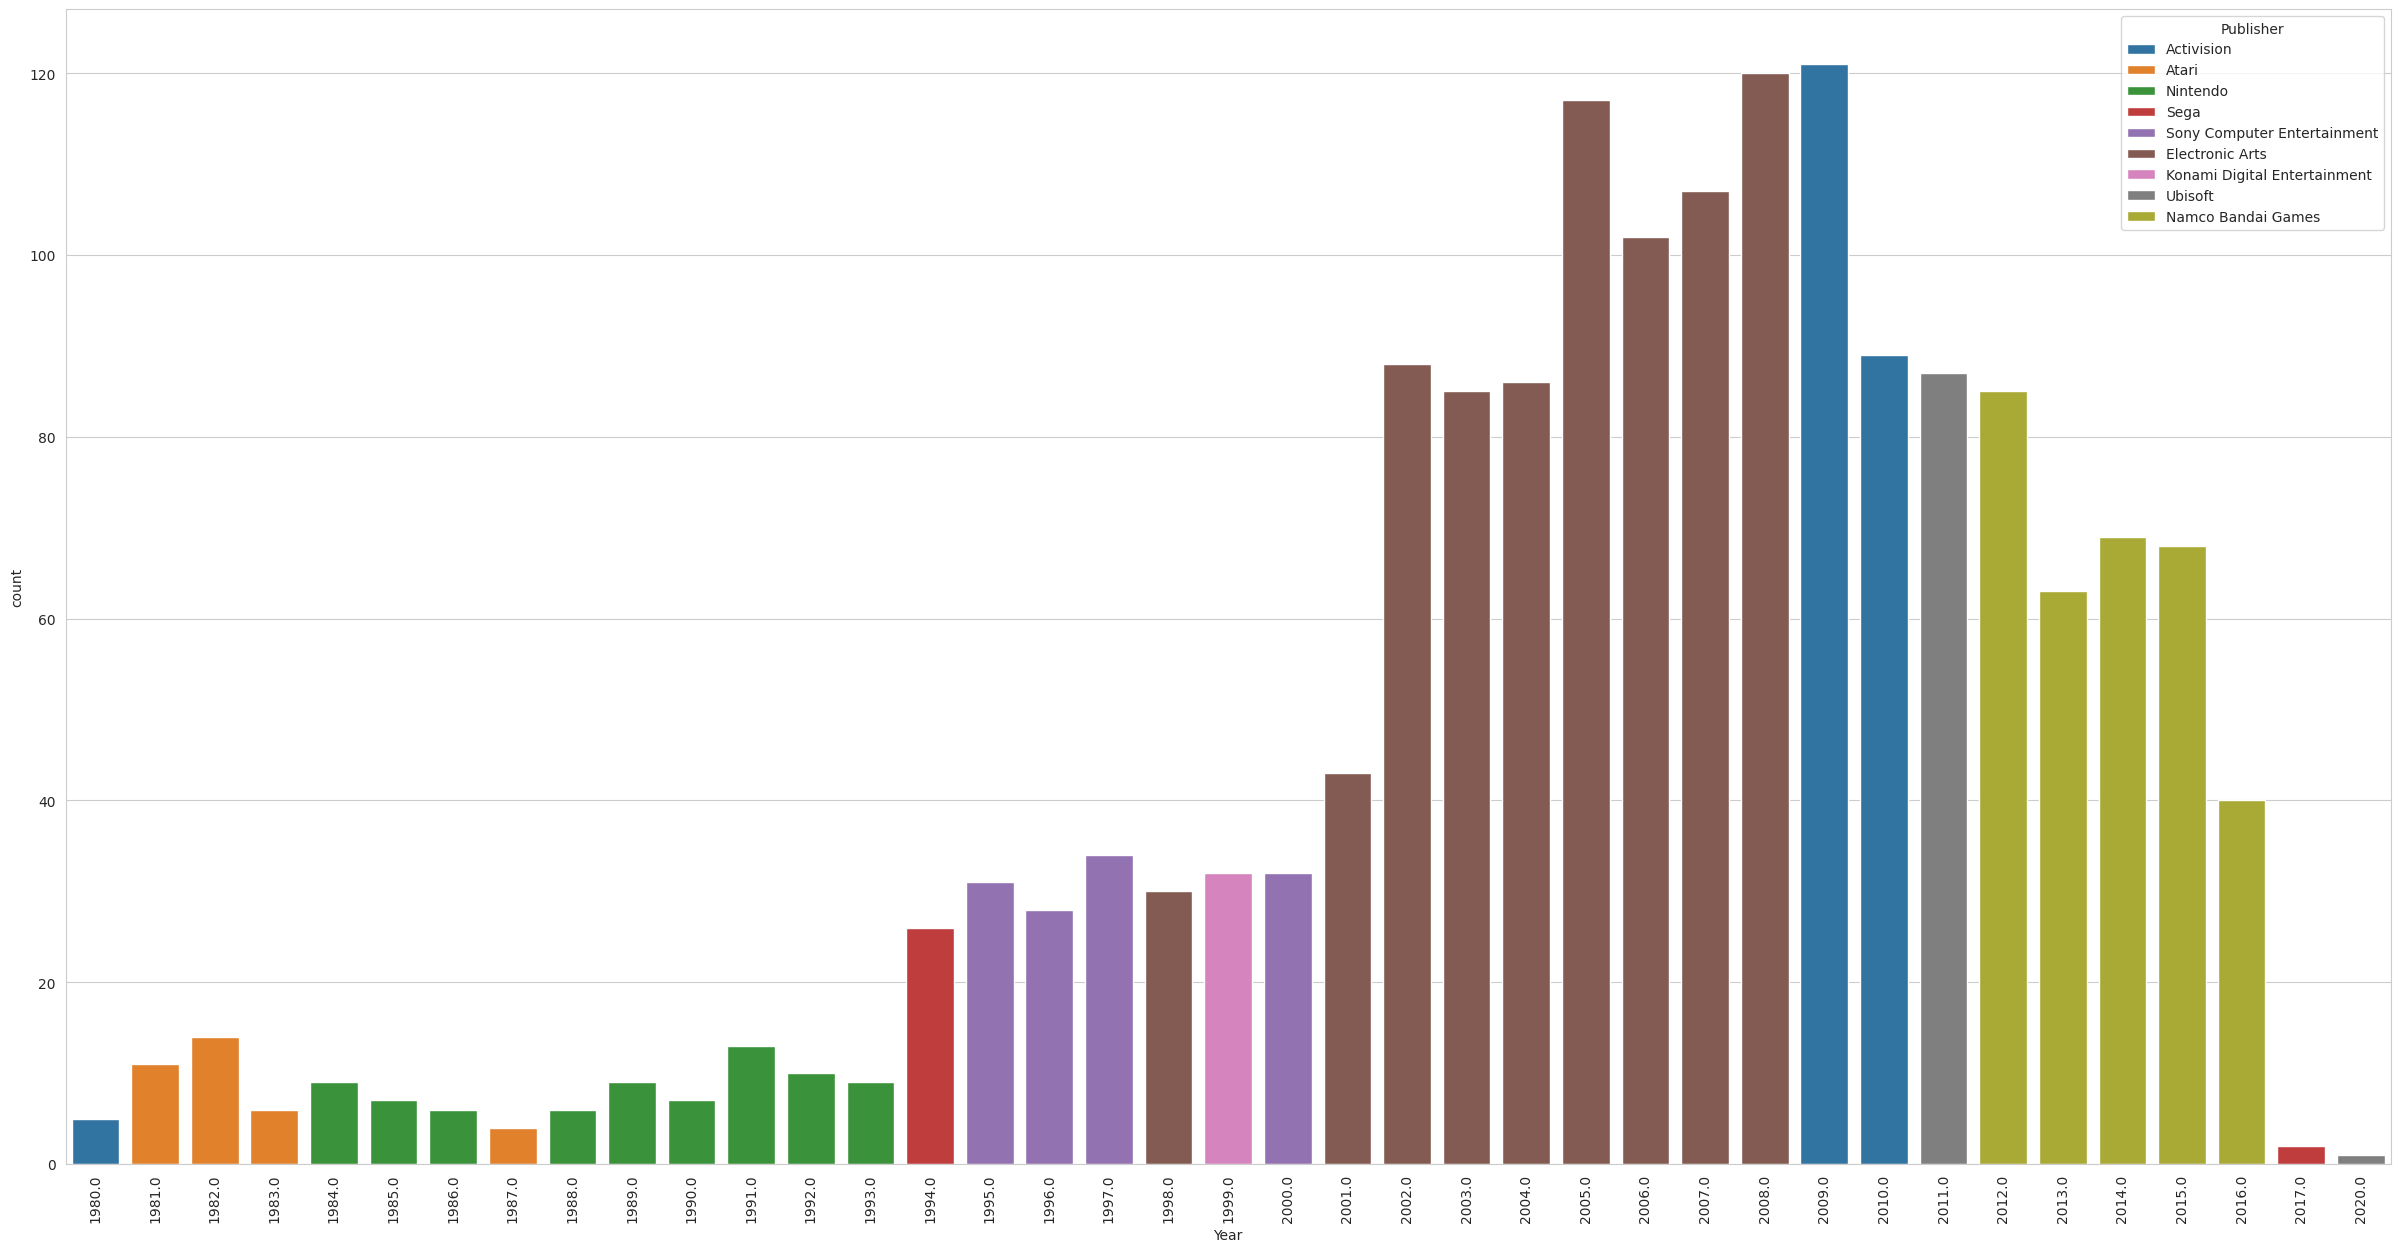

In [ ]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_Publisher, hue ='Publisher')



plt.xticks(rotation=90)
plt.show()

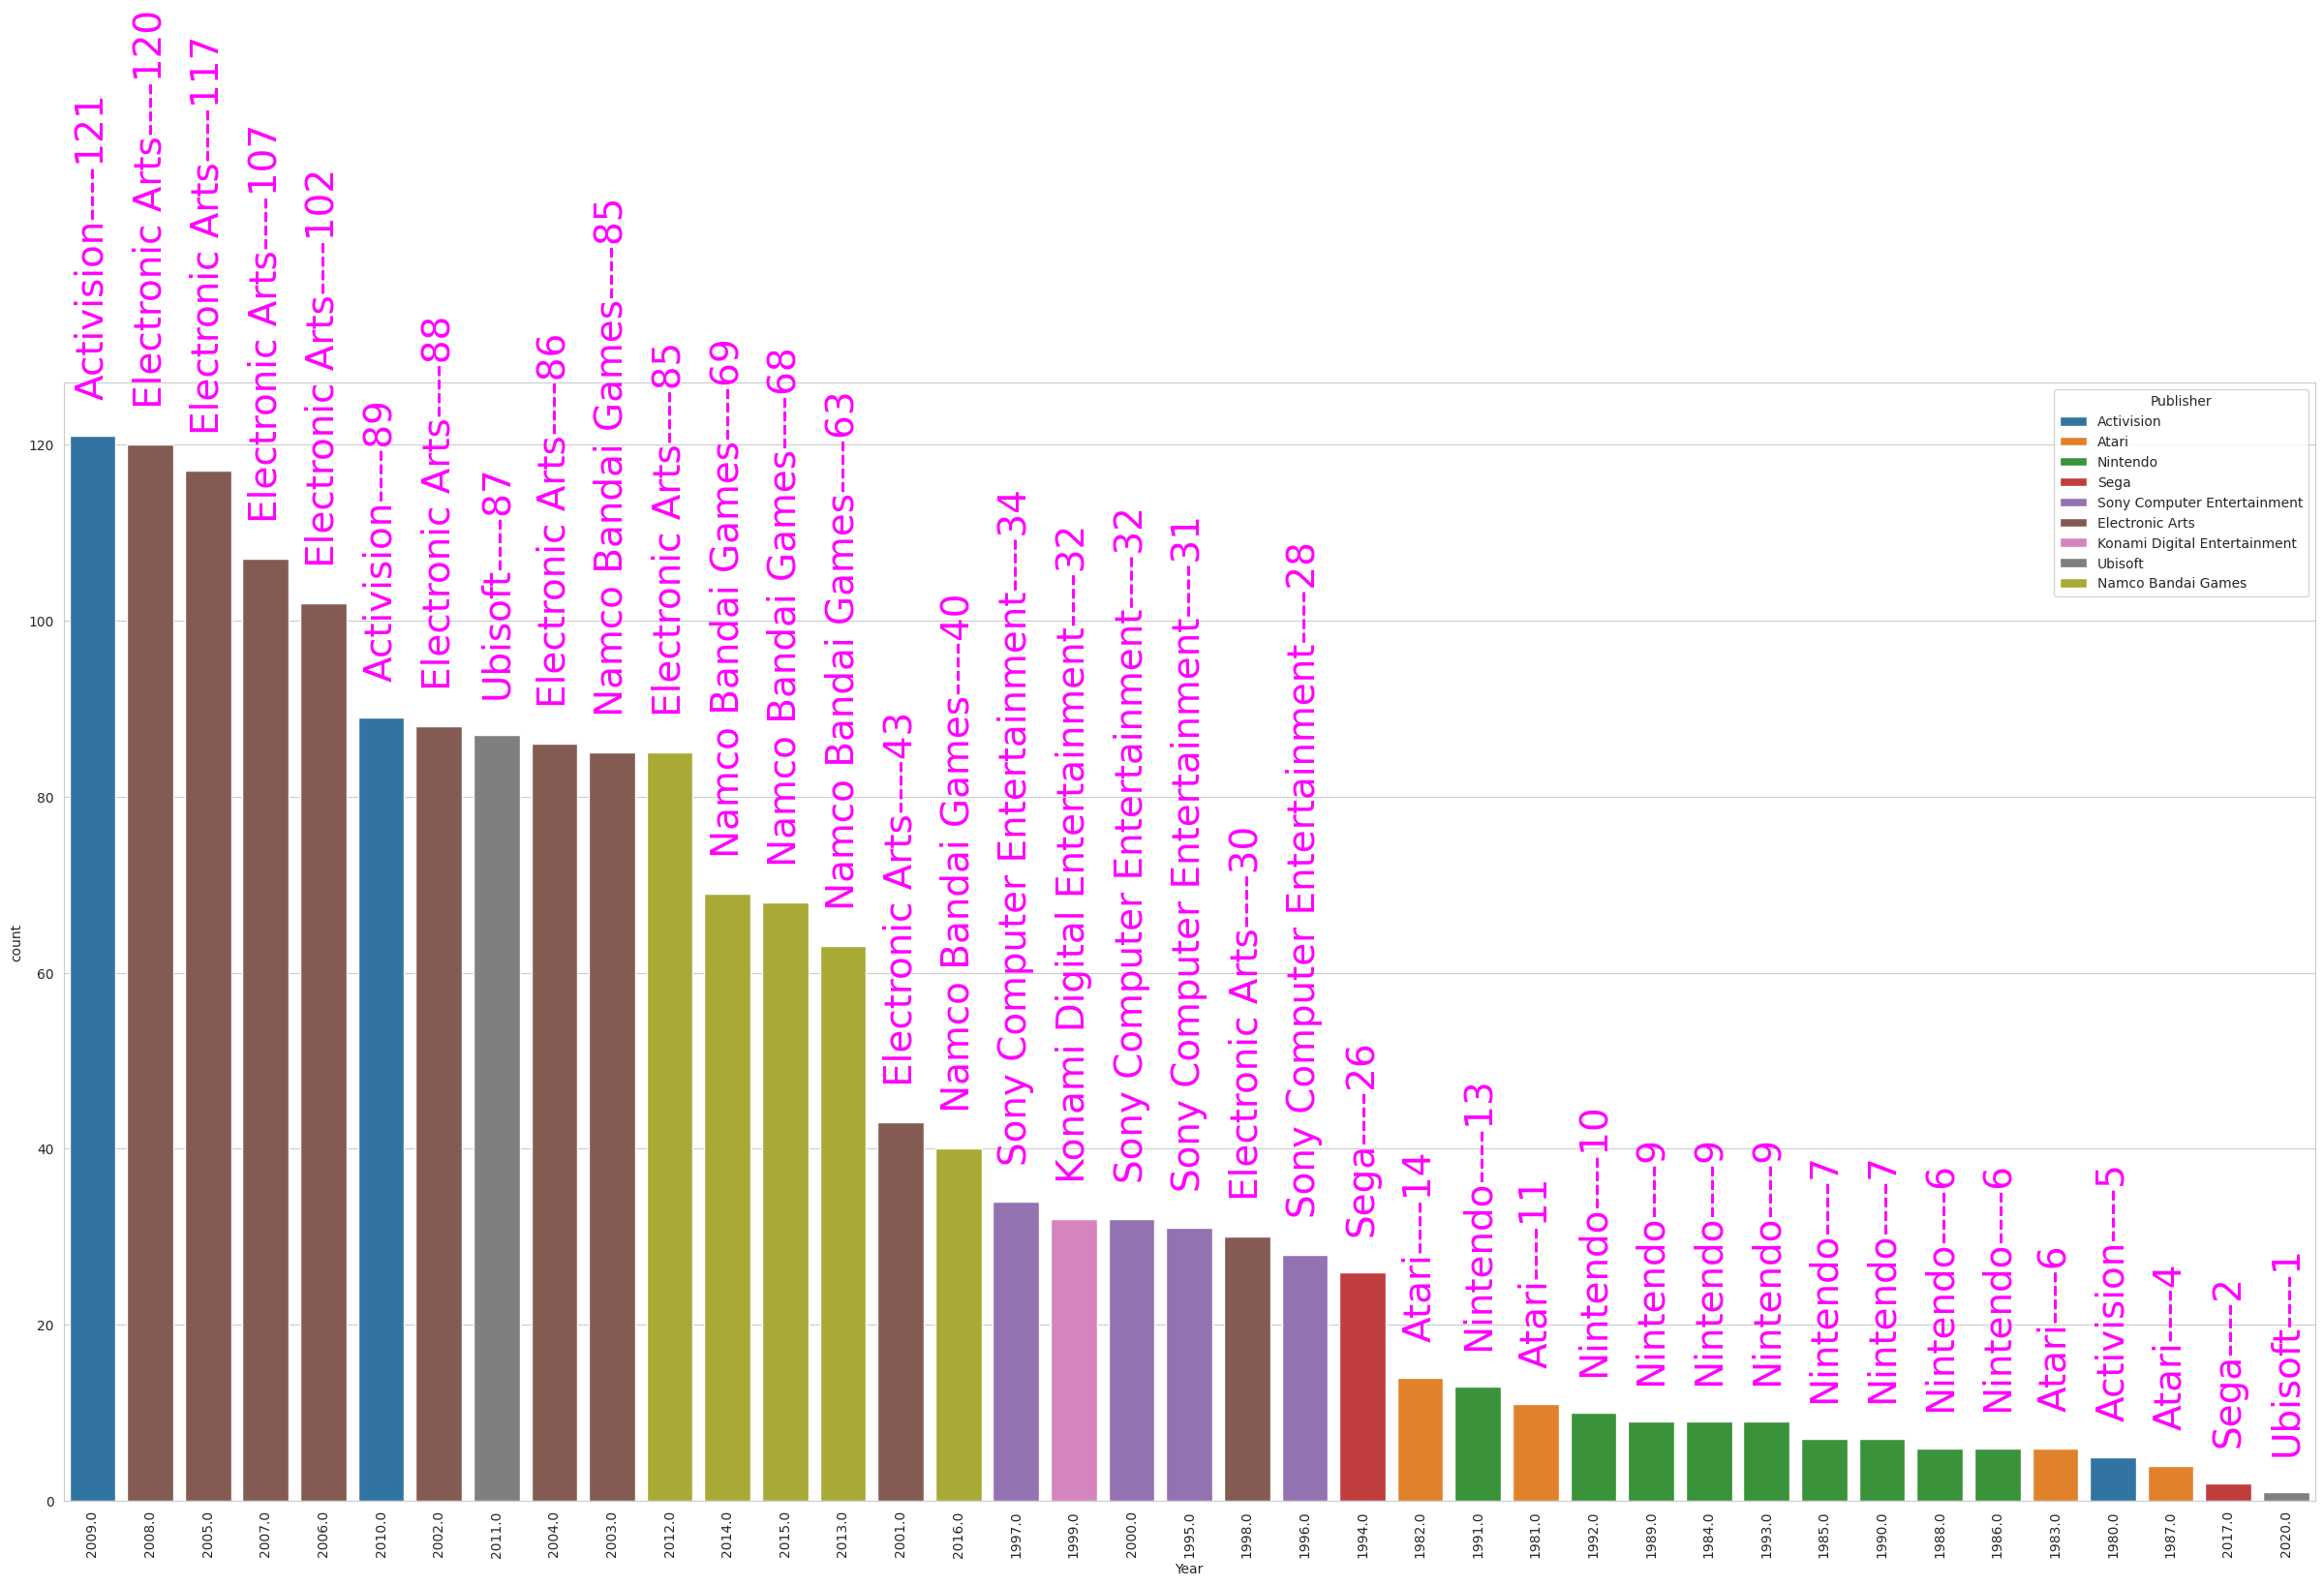

In [ ]:

# 使用直方圖畫出上面表格資料
year_max_Publisher_order = year_max_Publisher.sort_values(by='count', ascending=False).Year

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_Publisher, hue ='Publisher', order = year_max_Publisher_order)


#標示出每個直條代表的類型跟數目
Publisher = year_max_Publisher['Publisher'].values
index = 0
for value in year_max_Publisher['count'].values:
    g.text(index, value+5,
           str(Publisher[index] + '----' +str(value)),
           color='#FF00FF', size=28, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()

<ipython-input-12-7eec16fda85f>:5: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']


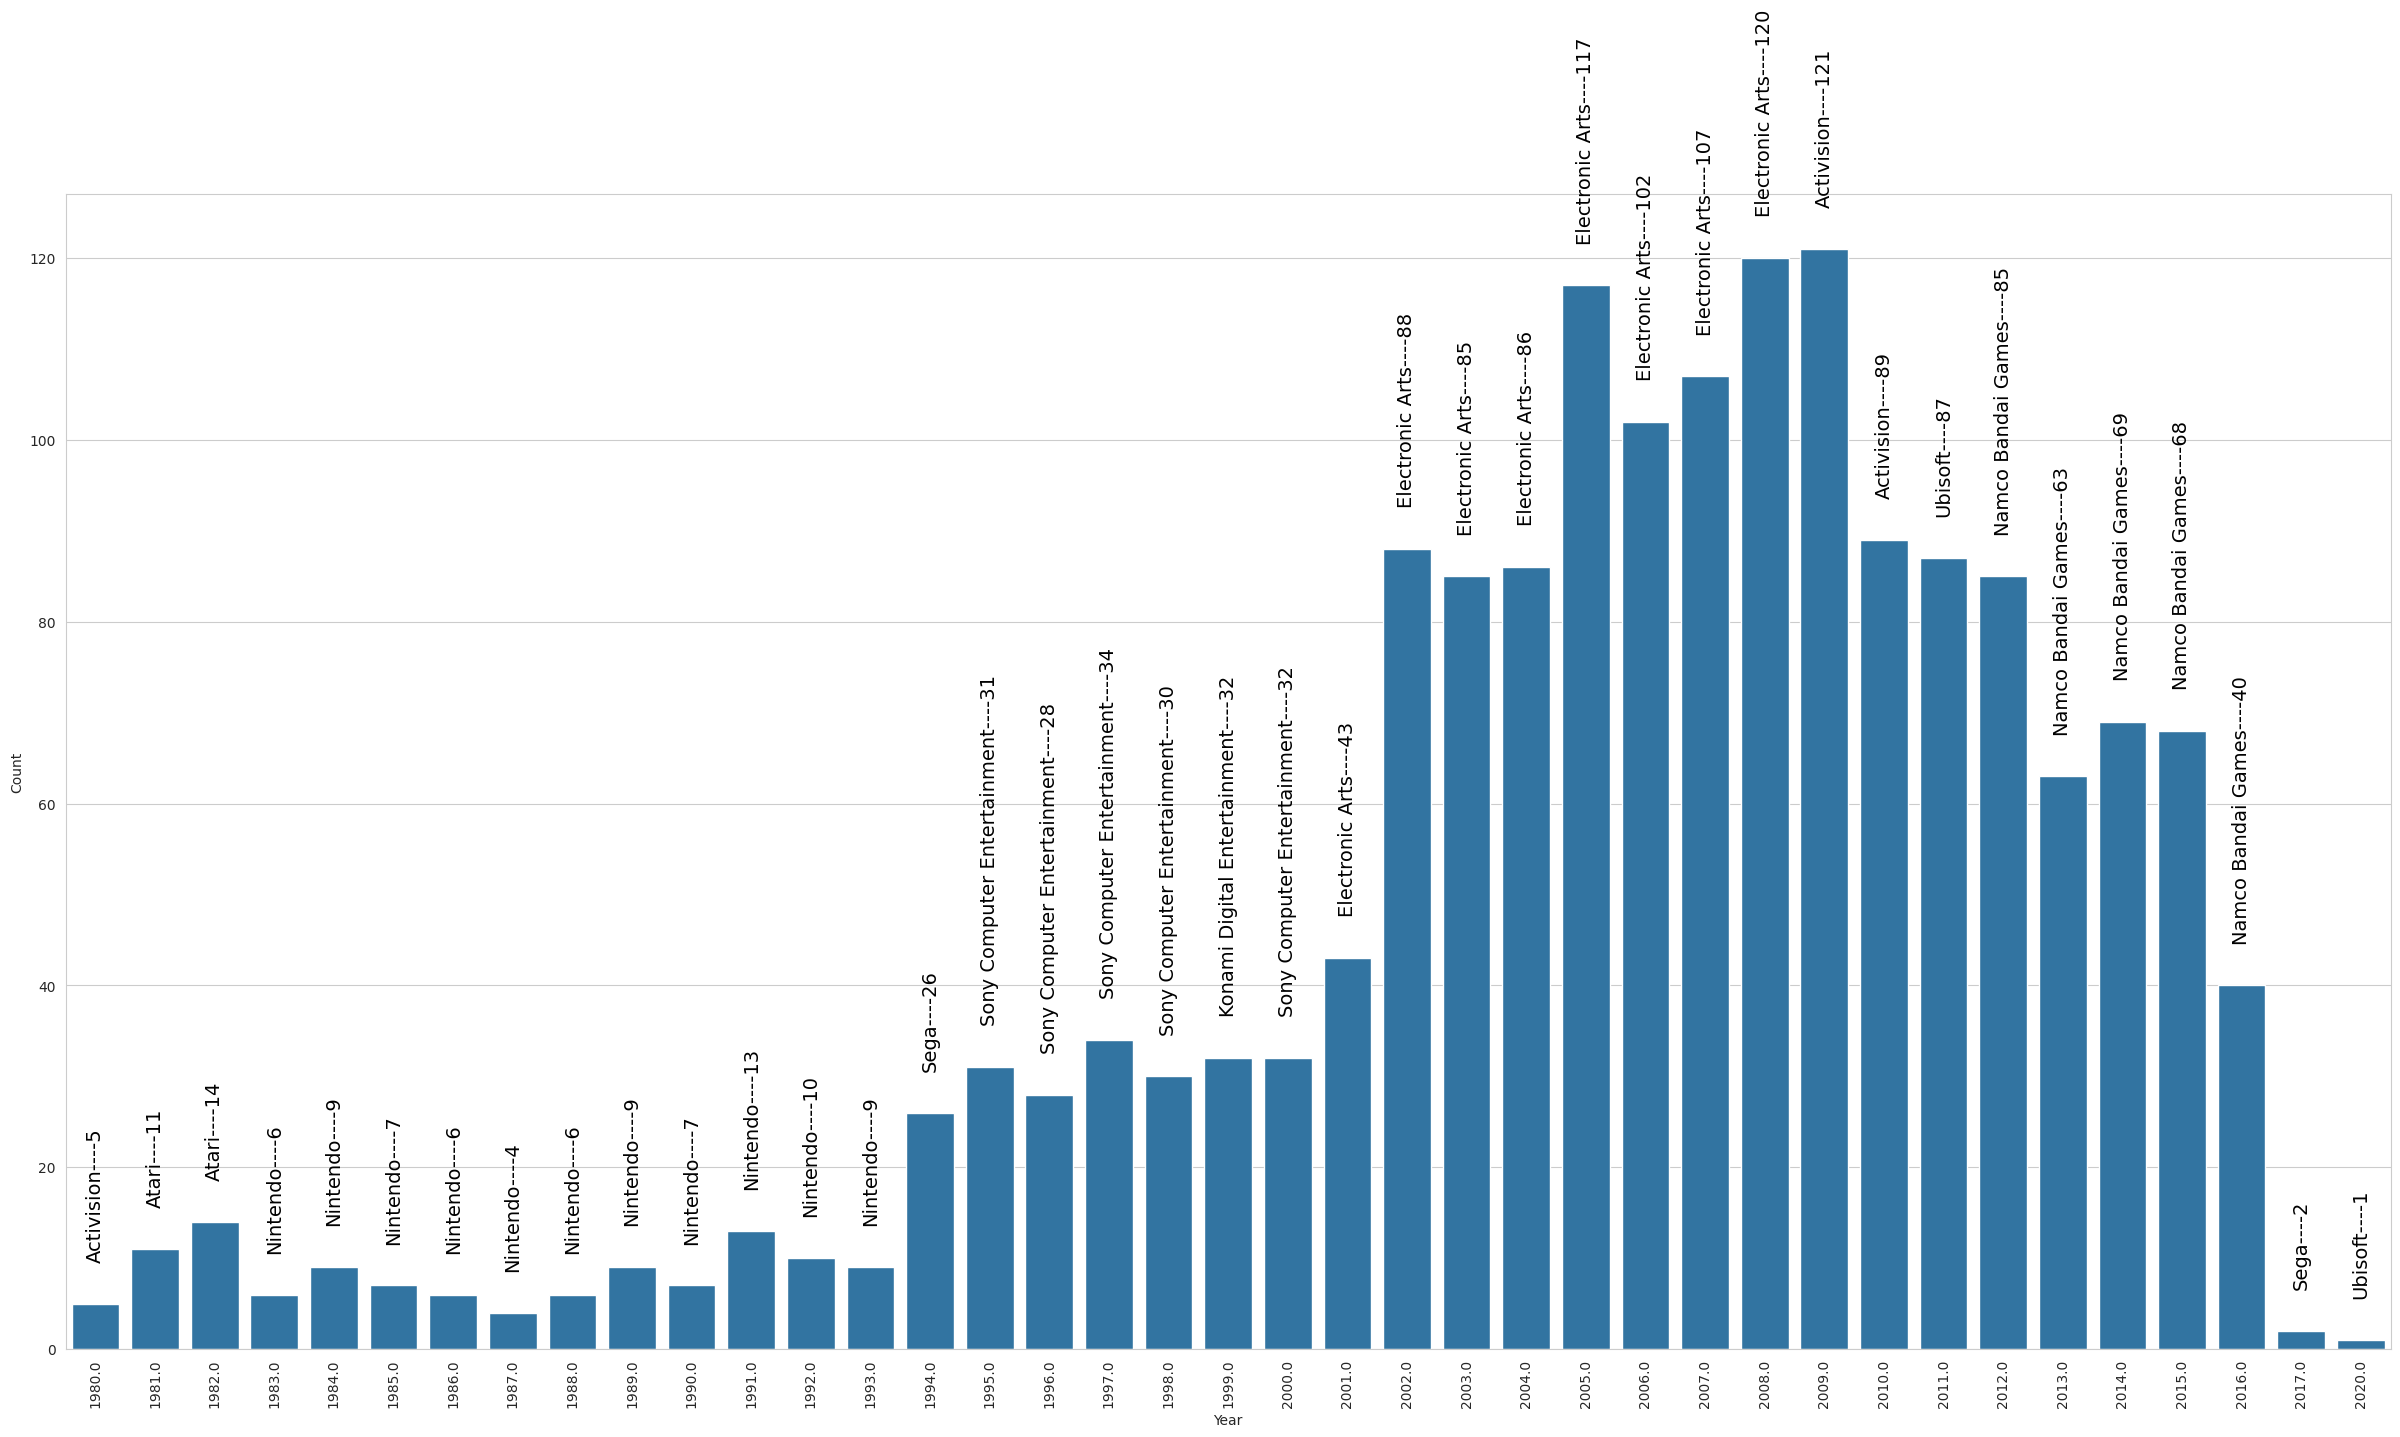

In [ ]:
# 解答版
# 計算每年分別是那些開發商的遊戲數目最多
top_publisher =  data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)
top_publisher_count
# 使用直方圖畫出上面表格資料
publisher= top_publisher_count['Publisher']
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

# 各區域遊戲的銷售總量

In [ ]:
# 計算四個不同區域的遊戲銷售總量
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index(name='sale')
top_sale_reg = top_sale_reg.rename(columns={"index": "region"})
top_sale_reg

,region,sale
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


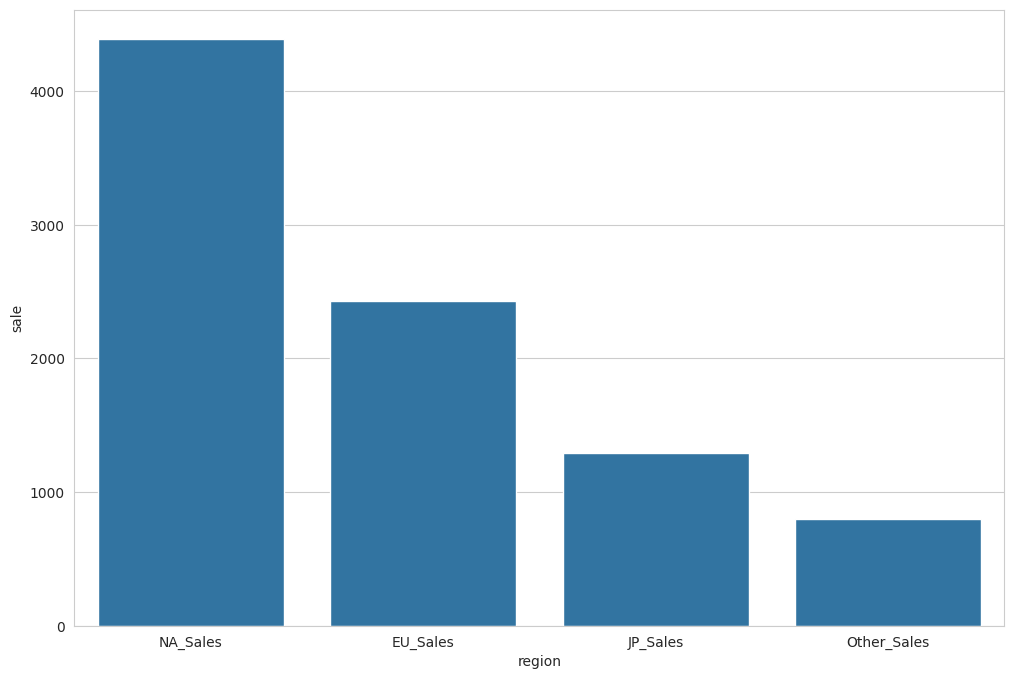

In [ ]:
# 使用直方圖來畫出各區域遊戲的銷售總量
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)
plt.show()

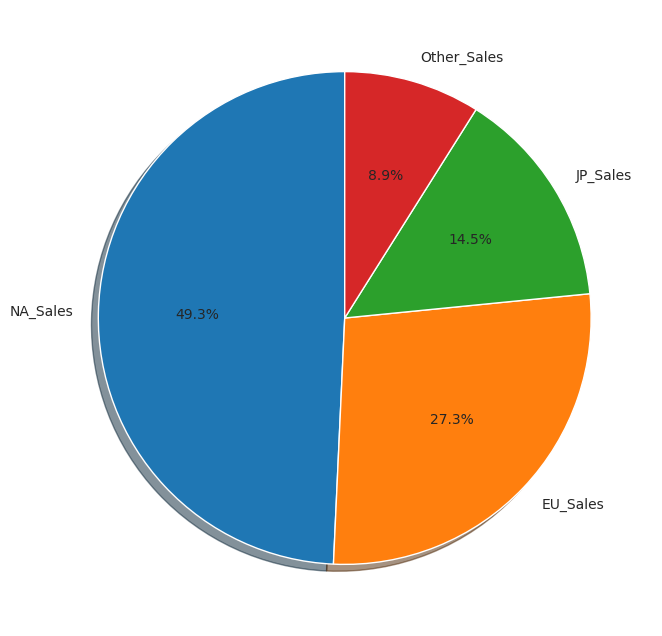

In [ ]:
# 使用圓餅圖來畫出各區域遊戲的銷售總量
# 提示： plt.pie()
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()